## データ準備

In [1]:
from sklearn import datasets

features, labels = datasets.load_boston(return_X_y =True)

In [2]:
from sklearn import model_selection

train_features, test_features, train_labels, test_labels = model_selection.train_test_split(features, labels, test_size=0.2)

In [3]:
print(train_features.shape)
print(train_labels.shape)
print(test_features.shape)
print(test_labels.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [4]:
import xgboost as xgb

trains = xgb.DMatrix(train_features, label=train_labels)
tests = xgb.DMatrix(test_features, label=test_labels)

## ハイパーパラメータ最適化

In [5]:
base_params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
}

watchlist = [(trains, 'train'), (tests, 'eval')]

In [6]:
import optuna
from sklearn.metrics import r2_score
import copy

tmp_params = copy.deepcopy(base_params)

def optimizer(trial):
#     booster = trial.suggest_categorical('booster', ['gbtree', 'dart', 'gblinear'])
    eta = trial.suggest_uniform('eta', 0.01, 0.3)
    max_depth = trial.suggest_int('max_depth', 4, 15)
    __lambda = trial.suggest_uniform('lambda', 0.7, 2)

#     params['booster'] = booster
    tmp_params['eta'] = eta
    tmp_params['max_depth'] = max_depth
    tmp_params['lambda'] = __lambda

    model = xgb.train(tmp_params, trains, num_boost_round=50)
    predicts = model.predict(tests)

    r2 = r2_score(test_labels, predicts)
    print(f'#{trial.number}, Result: {r2}, {trial.params}')

    return r2

In [7]:
study = optuna.create_study(direction='maximize')
study.optimize(optimizer, n_trials=500)

#0, Result: 0.9153797234954849, {'eta': 0.21541259325117842, 'max_depth': 4, 'lambda': 1.7243766588775653}


[I 2019-12-14 23:49:43,636] Finished trial#0 resulted in value: 0.9153797234954849. Current best value is 0.9153797234954849 with parameters: {'eta': 0.21541259325117842, 'max_depth': 4, 'lambda': 1.7243766588775653}.


#1, Result: 0.9277796354008809, {'eta': 0.1678675361241897, 'max_depth': 7, 'lambda': 1.9228108973855251}


[I 2019-12-14 23:49:43,734] Finished trial#1 resulted in value: 0.9277796354008809. Current best value is 0.9277796354008809 with parameters: {'eta': 0.1678675361241897, 'max_depth': 7, 'lambda': 1.9228108973855251}.


#2, Result: 0.8903499007997161, {'eta': 0.07375873958103377, 'max_depth': 13, 'lambda': 1.841310013076201}


[I 2019-12-14 23:49:43,856] Finished trial#2 resulted in value: 0.8903499007997161. Current best value is 0.9277796354008809 with parameters: {'eta': 0.1678675361241897, 'max_depth': 7, 'lambda': 1.9228108973855251}.


#3, Result: -0.5389500250005317, {'eta': 0.01679963233880122, 'max_depth': 12, 'lambda': 1.10230233115178}


[I 2019-12-14 23:49:43,946] Finished trial#3 resulted in value: -0.5389500250005317. Current best value is 0.9277796354008809 with parameters: {'eta': 0.1678675361241897, 'max_depth': 7, 'lambda': 1.9228108973855251}.


#4, Result: 0.9198816952408201, {'eta': 0.20098175168682178, 'max_depth': 15, 'lambda': 0.8793229262189051}


[I 2019-12-14 23:49:44,084] Finished trial#4 resulted in value: 0.9198816952408201. Current best value is 0.9277796354008809 with parameters: {'eta': 0.1678675361241897, 'max_depth': 7, 'lambda': 1.9228108973855251}.


#5, Result: 0.9231667316255817, {'eta': 0.16297544910229617, 'max_depth': 9, 'lambda': 1.7870377308090994}


[I 2019-12-14 23:49:44,198] Finished trial#5 resulted in value: 0.9231667316255817. Current best value is 0.9277796354008809 with parameters: {'eta': 0.1678675361241897, 'max_depth': 7, 'lambda': 1.9228108973855251}.


#6, Result: 0.9199923193016818, {'eta': 0.2862841789474982, 'max_depth': 5, 'lambda': 0.8778273548396429}


[I 2019-12-14 23:49:44,288] Finished trial#6 resulted in value: 0.9199923193016818. Current best value is 0.9277796354008809 with parameters: {'eta': 0.1678675361241897, 'max_depth': 7, 'lambda': 1.9228108973855251}.


#7, Result: 0.9044191701816793, {'eta': 0.2891424667852735, 'max_depth': 13, 'lambda': 1.8225659207117146}


[I 2019-12-14 23:49:44,418] Finished trial#7 resulted in value: 0.9044191701816793. Current best value is 0.9277796354008809 with parameters: {'eta': 0.1678675361241897, 'max_depth': 7, 'lambda': 1.9228108973855251}.


#8, Result: 0.9100028681006104, {'eta': 0.2620894049492869, 'max_depth': 10, 'lambda': 1.2095397921312723}


[I 2019-12-14 23:49:44,531] Finished trial#8 resulted in value: 0.9100028681006104. Current best value is 0.9277796354008809 with parameters: {'eta': 0.1678675361241897, 'max_depth': 7, 'lambda': 1.9228108973855251}.


#9, Result: 0.9197955794558372, {'eta': 0.20399315552474, 'max_depth': 9, 'lambda': 1.9588786564775198}


[I 2019-12-14 23:49:44,639] Finished trial#9 resulted in value: 0.9197955794558372. Current best value is 0.9277796354008809 with parameters: {'eta': 0.1678675361241897, 'max_depth': 7, 'lambda': 1.9228108973855251}.


#10, Result: 0.92212015408906, {'eta': 0.10624514910644134, 'max_depth': 6, 'lambda': 1.500672110088171}


[I 2019-12-14 23:49:44,734] Finished trial#10 resulted in value: 0.92212015408906. Current best value is 0.9277796354008809 with parameters: {'eta': 0.1678675361241897, 'max_depth': 7, 'lambda': 1.9228108973855251}.


#11, Result: 0.9261918727661687, {'eta': 0.14087605283292928, 'max_depth': 8, 'lambda': 1.584679828282635}


[I 2019-12-14 23:49:44,851] Finished trial#11 resulted in value: 0.9261918727661687. Current best value is 0.9277796354008809 with parameters: {'eta': 0.1678675361241897, 'max_depth': 7, 'lambda': 1.9228108973855251}.


#12, Result: 0.9254086415135315, {'eta': 0.12378404143244917, 'max_depth': 7, 'lambda': 1.523111771369333}


[I 2019-12-14 23:49:44,956] Finished trial#12 resulted in value: 0.9254086415135315. Current best value is 0.9277796354008809 with parameters: {'eta': 0.1678675361241897, 'max_depth': 7, 'lambda': 1.9228108973855251}.


#13, Result: 0.9189037656942631, {'eta': 0.1569036170610941, 'max_depth': 7, 'lambda': 1.5589810796251513}


[I 2019-12-14 23:49:45,057] Finished trial#13 resulted in value: 0.9189037656942631. Current best value is 0.9277796354008809 with parameters: {'eta': 0.1678675361241897, 'max_depth': 7, 'lambda': 1.9228108973855251}.


#14, Result: 0.8699092000235065, {'eta': 0.06042350908567978, 'max_depth': 8, 'lambda': 1.390032934523884}


[I 2019-12-14 23:49:45,159] Finished trial#14 resulted in value: 0.8699092000235065. Current best value is 0.9277796354008809 with parameters: {'eta': 0.1678675361241897, 'max_depth': 7, 'lambda': 1.9228108973855251}.


#15, Result: 0.9200061663797519, {'eta': 0.12990917290380213, 'max_depth': 11, 'lambda': 1.9654379120689116}


[I 2019-12-14 23:49:45,276] Finished trial#15 resulted in value: 0.9200061663797519. Current best value is 0.9277796354008809 with parameters: {'eta': 0.1678675361241897, 'max_depth': 7, 'lambda': 1.9228108973855251}.


#16, Result: 0.929389611081001, {'eta': 0.1815242071870596, 'max_depth': 4, 'lambda': 1.704258762987139}


[I 2019-12-14 23:49:45,362] Finished trial#16 resulted in value: 0.929389611081001. Current best value is 0.929389611081001 with parameters: {'eta': 0.1815242071870596, 'max_depth': 4, 'lambda': 1.704258762987139}.


#17, Result: 0.9168555175760567, {'eta': 0.24255561373147577, 'max_depth': 5, 'lambda': 1.9790086065993784}


[I 2019-12-14 23:49:45,454] Finished trial#17 resulted in value: 0.9168555175760567. Current best value is 0.929389611081001 with parameters: {'eta': 0.1815242071870596, 'max_depth': 4, 'lambda': 1.704258762987139}.


#18, Result: 0.9196366514074473, {'eta': 0.1781618801098577, 'max_depth': 4, 'lambda': 1.7676689388604827}


[I 2019-12-14 23:49:45,539] Finished trial#18 resulted in value: 0.9196366514074473. Current best value is 0.929389611081001 with parameters: {'eta': 0.1815242071870596, 'max_depth': 4, 'lambda': 1.704258762987139}.


#19, Result: 0.9248634243160527, {'eta': 0.2338404741109091, 'max_depth': 6, 'lambda': 1.6632424059824051}


[I 2019-12-14 23:49:45,640] Finished trial#19 resulted in value: 0.9248634243160527. Current best value is 0.929389611081001 with parameters: {'eta': 0.1815242071870596, 'max_depth': 4, 'lambda': 1.704258762987139}.


#20, Result: 0.916834985562206, {'eta': 0.18296072383443934, 'max_depth': 4, 'lambda': 1.905327251371742}


[I 2019-12-14 23:49:45,726] Finished trial#20 resulted in value: 0.916834985562206. Current best value is 0.929389611081001 with parameters: {'eta': 0.1815242071870596, 'max_depth': 4, 'lambda': 1.704258762987139}.


#21, Result: 0.9314429065640143, {'eta': 0.13495618855134897, 'max_depth': 8, 'lambda': 1.6287296188923126}


[I 2019-12-14 23:49:45,831] Finished trial#21 resulted in value: 0.9314429065640143. Current best value is 0.9314429065640143 with parameters: {'eta': 0.13495618855134897, 'max_depth': 8, 'lambda': 1.6287296188923126}.


#22, Result: 0.921313195918373, {'eta': 0.09705621829136188, 'max_depth': 7, 'lambda': 1.3630322047504133}


[I 2019-12-14 23:49:45,931] Finished trial#22 resulted in value: 0.921313195918373. Current best value is 0.9314429065640143 with parameters: {'eta': 0.13495618855134897, 'max_depth': 8, 'lambda': 1.6287296188923126}.


#23, Result: 0.9126734116875936, {'eta': 0.174113280624106, 'max_depth': 10, 'lambda': 1.6444665931377063}


[I 2019-12-14 23:49:46,052] Finished trial#23 resulted in value: 0.9126734116875936. Current best value is 0.9314429065640143 with parameters: {'eta': 0.13495618855134897, 'max_depth': 8, 'lambda': 1.6287296188923126}.


#24, Result: 0.9261725570362586, {'eta': 0.14177049268303135, 'max_depth': 8, 'lambda': 1.450266097633859}


[I 2019-12-14 23:49:46,163] Finished trial#24 resulted in value: 0.9261725570362586. Current best value is 0.9314429065640143 with parameters: {'eta': 0.13495618855134897, 'max_depth': 8, 'lambda': 1.6287296188923126}.


#25, Result: 0.9085485267002584, {'eta': 0.08784108535071702, 'max_depth': 6, 'lambda': 1.242372387254226}


[I 2019-12-14 23:49:46,263] Finished trial#25 resulted in value: 0.9085485267002584. Current best value is 0.9314429065640143 with parameters: {'eta': 0.13495618855134897, 'max_depth': 8, 'lambda': 1.6287296188923126}.


#26, Result: 0.5499236628325479, {'eta': 0.034327542425921065, 'max_depth': 5, 'lambda': 1.6838609607123391}


[I 2019-12-14 23:49:46,362] Finished trial#26 resulted in value: 0.5499236628325479. Current best value is 0.9314429065640143 with parameters: {'eta': 0.13495618855134897, 'max_depth': 8, 'lambda': 1.6287296188923126}.


#27, Result: 0.9169752195477283, {'eta': 0.11711429635665327, 'max_depth': 9, 'lambda': 1.8824183336315752}


[I 2019-12-14 23:49:46,474] Finished trial#27 resulted in value: 0.9169752195477283. Current best value is 0.9314429065640143 with parameters: {'eta': 0.13495618855134897, 'max_depth': 8, 'lambda': 1.6287296188923126}.


#28, Result: 0.9259539446286392, {'eta': 0.19143568606807904, 'max_depth': 7, 'lambda': 1.6131892596453037}


[I 2019-12-14 23:49:46,582] Finished trial#28 resulted in value: 0.9259539446286392. Current best value is 0.9314429065640143 with parameters: {'eta': 0.13495618855134897, 'max_depth': 8, 'lambda': 1.6287296188923126}.


#29, Result: 0.9119900851756799, {'eta': 0.21513620805339068, 'max_depth': 4, 'lambda': 1.77644318968722}


[I 2019-12-14 23:49:46,672] Finished trial#29 resulted in value: 0.9119900851756799. Current best value is 0.9314429065640143 with parameters: {'eta': 0.13495618855134897, 'max_depth': 8, 'lambda': 1.6287296188923126}.


#30, Result: 0.9267626152275912, {'eta': 0.14565571174308137, 'max_depth': 11, 'lambda': 1.7242690715428994}


[I 2019-12-14 23:49:46,799] Finished trial#30 resulted in value: 0.9267626152275912. Current best value is 0.9314429065640143 with parameters: {'eta': 0.13495618855134897, 'max_depth': 8, 'lambda': 1.6287296188923126}.


#31, Result: 0.9310338220782849, {'eta': 0.1504476259692928, 'max_depth': 11, 'lambda': 1.7167546273865697}


[I 2019-12-14 23:49:46,928] Finished trial#31 resulted in value: 0.9310338220782849. Current best value is 0.9314429065640143 with parameters: {'eta': 0.13495618855134897, 'max_depth': 8, 'lambda': 1.6287296188923126}.


#32, Result: 0.9199830741622247, {'eta': 0.16068316572316832, 'max_depth': 11, 'lambda': 1.8861678027124507}


[I 2019-12-14 23:49:47,058] Finished trial#32 resulted in value: 0.9199830741622247. Current best value is 0.9314429065640143 with parameters: {'eta': 0.13495618855134897, 'max_depth': 8, 'lambda': 1.6287296188923126}.


#33, Result: 0.9372007509352858, {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}


[I 2019-12-14 23:49:47,198] Finished trial#33 resulted in value: 0.9372007509352858. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#34, Result: 0.9283630825660186, {'eta': 0.11433018777338497, 'max_depth': 14, 'lambda': 1.710025211711597}


[I 2019-12-14 23:49:47,328] Finished trial#34 resulted in value: 0.9283630825660186. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#35, Result: 0.9260381812746978, {'eta': 0.22365479883575567, 'max_depth': 12, 'lambda': 1.4592911550645173}


[I 2019-12-14 23:49:47,459] Finished trial#35 resulted in value: 0.9260381812746978. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#36, Result: 0.9277388729558069, {'eta': 0.19643296667110607, 'max_depth': 12, 'lambda': 1.6223458808308584}


[I 2019-12-14 23:49:47,589] Finished trial#36 resulted in value: 0.9277388729558069. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#37, Result: 0.9334930877312893, {'eta': 0.169945082625228, 'max_depth': 13, 'lambda': 1.7961021421407521}


[I 2019-12-14 23:49:47,724] Finished trial#37 resulted in value: 0.9334930877312893. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#38, Result: 0.9286361376663909, {'eta': 0.13453132495204945, 'max_depth': 15, 'lambda': 1.8189482679833766}


[I 2019-12-14 23:49:47,860] Finished trial#38 resulted in value: 0.9286361376663909. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#39, Result: 0.8861177959737314, {'eta': 0.0657083134377225, 'max_depth': 13, 'lambda': 1.2916700780556376}


[I 2019-12-14 23:49:47,987] Finished trial#39 resulted in value: 0.8861177959737314. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#40, Result: 0.9319836320018803, {'eta': 0.1668066056895954, 'max_depth': 14, 'lambda': 1.837502367243101}


[I 2019-12-14 23:49:48,131] Finished trial#40 resulted in value: 0.9319836320018803. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#41, Result: 0.9251318565237996, {'eta': 0.154137022389845, 'max_depth': 14, 'lambda': 1.847899982226829}


[I 2019-12-14 23:49:48,266] Finished trial#41 resulted in value: 0.9251318565237996. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#42, Result: 0.9308952559310444, {'eta': 0.16403975684200447, 'max_depth': 14, 'lambda': 0.7199010919187004}


[I 2019-12-14 23:49:48,402] Finished trial#42 resulted in value: 0.9308952559310444. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#43, Result: 0.9212138008395099, {'eta': 0.16763631164461457, 'max_depth': 12, 'lambda': 1.7952097638321556}


[I 2019-12-14 23:49:48,542] Finished trial#43 resulted in value: 0.9212138008395099. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#44, Result: 0.9345376522390287, {'eta': 0.20837126972016023, 'max_depth': 13, 'lambda': 1.7746679027316152}


[I 2019-12-14 23:49:48,687] Finished trial#44 resulted in value: 0.9345376522390287. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#45, Result: 0.9047664655394712, {'eta': 0.20998938098409756, 'max_depth': 13, 'lambda': 1.9927387590153063}


[I 2019-12-14 23:49:48,830] Finished trial#45 resulted in value: 0.9047664655394712. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#46, Result: 0.924050729602391, {'eta': 0.19093174275040545, 'max_depth': 14, 'lambda': 1.9307878753222338}


[I 2019-12-14 23:49:48,975] Finished trial#46 resulted in value: 0.924050729602391. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#47, Result: 0.924873927126699, {'eta': 0.25816408950290454, 'max_depth': 15, 'lambda': 1.5500835835026683}


[I 2019-12-14 23:49:49,130] Finished trial#47 resulted in value: 0.924873927126699. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#48, Result: 0.9157880324026968, {'eta': 0.22715404378396054, 'max_depth': 13, 'lambda': 1.8572715927872288}


[I 2019-12-14 23:49:49,280] Finished trial#48 resulted in value: 0.9157880324026968. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#49, Result: 0.926578242331784, {'eta': 0.2530620154922501, 'max_depth': 14, 'lambda': 1.1109773166404777}


[I 2019-12-14 23:49:49,434] Finished trial#49 resulted in value: 0.926578242331784. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#50, Result: 0.9155668118241759, {'eta': 0.20307060531038904, 'max_depth': 13, 'lambda': 1.7592890983134002}


[I 2019-12-14 23:49:49,590] Finished trial#50 resulted in value: 0.9155668118241759. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#51, Result: 0.9249655002553593, {'eta': 0.1262728328768496, 'max_depth': 11, 'lambda': 1.7303142742296749}


[I 2019-12-14 23:49:49,723] Finished trial#51 resulted in value: 0.9249655002553593. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#52, Result: 0.9214288824716625, {'eta': 0.14745057697597846, 'max_depth': 12, 'lambda': 1.5987315463554415}


[I 2019-12-14 23:49:49,860] Finished trial#52 resulted in value: 0.9214288824716625. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#53, Result: 0.9362682831376739, {'eta': 0.17279223039396205, 'max_depth': 11, 'lambda': 1.6722176834335365}


[I 2019-12-14 23:49:49,996] Finished trial#53 resulted in value: 0.9362682831376739. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#54, Result: 0.9270275953175161, {'eta': 0.17498027414180875, 'max_depth': 10, 'lambda': 1.8263008235823992}


[I 2019-12-14 23:49:50,126] Finished trial#54 resulted in value: 0.9270275953175161. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#55, Result: 0.9231372377738245, {'eta': 0.2755512306651855, 'max_depth': 12, 'lambda': 1.6628690460187416}


[I 2019-12-14 23:49:50,275] Finished trial#55 resulted in value: 0.9231372377738245. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#56, Result: 0.9305990607857992, {'eta': 0.18649581003596985, 'max_depth': 10, 'lambda': 1.505738642475016}


[I 2019-12-14 23:49:50,407] Finished trial#56 resulted in value: 0.9305990607857992. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#57, Result: 0.9190987369964894, {'eta': 0.17025465413086233, 'max_depth': 13, 'lambda': 1.9373672832079476}


[I 2019-12-14 23:49:50,552] Finished trial#57 resulted in value: 0.9190987369964894. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#58, Result: 0.9257676495986878, {'eta': 0.1342163638440762, 'max_depth': 15, 'lambda': 1.7582617923794195}


[I 2019-12-14 23:49:50,702] Finished trial#58 resulted in value: 0.9257676495986878. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#59, Result: 0.9360296114489084, {'eta': 0.16112384330401647, 'max_depth': 9, 'lambda': 1.6566956187937052}


[I 2019-12-14 23:49:50,830] Finished trial#59 resulted in value: 0.9360296114489084. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#60, Result: 0.9259074043516, {'eta': 0.19969085804173511, 'max_depth': 9, 'lambda': 1.5479591198858542}


[I 2019-12-14 23:49:50,963] Finished trial#60 resulted in value: 0.9259074043516. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#61, Result: 0.9309066485934475, {'eta': 0.15461358496564828, 'max_depth': 8, 'lambda': 1.665759120111161}


[I 2019-12-14 23:49:51,085] Finished trial#61 resulted in value: 0.9309066485934475. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#62, Result: 0.9249268904998897, {'eta': 0.17798059127172766, 'max_depth': 10, 'lambda': 1.8078164390515163}


[I 2019-12-14 23:49:51,216] Finished trial#62 resulted in value: 0.9249268904998897. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#63, Result: 0.9129244202995944, {'eta': 0.1648199790556857, 'max_depth': 9, 'lambda': 1.5808111744845965}


[I 2019-12-14 23:49:51,344] Finished trial#63 resulted in value: 0.9129244202995944. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#64, Result: 0.9235930393831435, {'eta': 0.10731258355121104, 'max_depth': 8, 'lambda': 1.627311683962285}


[I 2019-12-14 23:49:51,465] Finished trial#64 resulted in value: 0.9235930393831435. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#65, Result: 0.9273907612823841, {'eta': 0.14102048869968575, 'max_depth': 13, 'lambda': 1.690113173834551}


[I 2019-12-14 23:49:51,612] Finished trial#65 resulted in value: 0.9273907612823841. Current best value is 0.9372007509352858 with parameters: {'eta': 0.17077892806688383, 'max_depth': 12, 'lambda': 1.7204547085966548}.


#66, Result: 0.9374965507371705, {'eta': 0.18413945125176628, 'max_depth': 12, 'lambda': 1.8709034289574378}


[I 2019-12-14 23:49:51,760] Finished trial#66 resulted in value: 0.9374965507371705. Current best value is 0.9374965507371705 with parameters: {'eta': 0.18413945125176628, 'max_depth': 12, 'lambda': 1.8709034289574378}.


#67, Result: 0.91794268099321, {'eta': 0.21365727655281141, 'max_depth': 12, 'lambda': 1.8875494878941428}


[I 2019-12-14 23:49:51,904] Finished trial#67 resulted in value: 0.91794268099321. Current best value is 0.9374965507371705 with parameters: {'eta': 0.18413945125176628, 'max_depth': 12, 'lambda': 1.8709034289574378}.


#68, Result: 0.9321548656395398, {'eta': 0.18635967354511587, 'max_depth': 11, 'lambda': 1.754377829921707}


[I 2019-12-14 23:49:52,045] Finished trial#68 resulted in value: 0.9321548656395398. Current best value is 0.9374965507371705 with parameters: {'eta': 0.18413945125176628, 'max_depth': 12, 'lambda': 1.8709034289574378}.


#69, Result: 0.9363777877742137, {'eta': 0.1874015622255255, 'max_depth': 11, 'lambda': 1.7403473073358822}


[I 2019-12-14 23:49:52,187] Finished trial#69 resulted in value: 0.9363777877742137. Current best value is 0.9374965507371705 with parameters: {'eta': 0.18413945125176628, 'max_depth': 12, 'lambda': 1.8709034289574378}.


#70, Result: 0.9228177534978588, {'eta': 0.2251378994461812, 'max_depth': 11, 'lambda': 1.4307784782359747}


[I 2019-12-14 23:49:52,322] Finished trial#70 resulted in value: 0.9228177534978588. Current best value is 0.9374965507371705 with parameters: {'eta': 0.18413945125176628, 'max_depth': 12, 'lambda': 1.8709034289574378}.


#71, Result: 0.9293582690190567, {'eta': 0.18527090716473776, 'max_depth': 11, 'lambda': 1.7608218546859837}


[I 2019-12-14 23:49:52,458] Finished trial#71 resulted in value: 0.9293582690190567. Current best value is 0.9374965507371705 with parameters: {'eta': 0.18413945125176628, 'max_depth': 12, 'lambda': 1.8709034289574378}.


#72, Result: 0.9340673540377334, {'eta': 0.2079941037622185, 'max_depth': 12, 'lambda': 1.7496468824469955}


[I 2019-12-14 23:49:52,602] Finished trial#72 resulted in value: 0.9340673540377334. Current best value is 0.9374965507371705 with parameters: {'eta': 0.18413945125176628, 'max_depth': 12, 'lambda': 1.8709034289574378}.


#73, Result: 0.9202007154806725, {'eta': 0.23893765939773742, 'max_depth': 12, 'lambda': 1.799569325660626}


[I 2019-12-14 23:49:52,745] Finished trial#73 resulted in value: 0.9202007154806725. Current best value is 0.9374965507371705 with parameters: {'eta': 0.18413945125176628, 'max_depth': 12, 'lambda': 1.8709034289574378}.


#74, Result: 0.9271796889162887, {'eta': 0.19504431709034098, 'max_depth': 13, 'lambda': 1.7239064707500933}


[I 2019-12-14 23:49:52,891] Finished trial#74 resulted in value: 0.9271796889162887. Current best value is 0.9374965507371705 with parameters: {'eta': 0.18413945125176628, 'max_depth': 12, 'lambda': 1.8709034289574378}.


#75, Result: 0.9236595898236496, {'eta': 0.20189607801749676, 'max_depth': 12, 'lambda': 1.861038123053955}


[I 2019-12-14 23:49:53,033] Finished trial#75 resulted in value: 0.9236595898236496. Current best value is 0.9374965507371705 with parameters: {'eta': 0.18413945125176628, 'max_depth': 12, 'lambda': 1.8709034289574378}.


#76, Result: 0.9198399407935265, {'eta': 0.2071360303364982, 'max_depth': 10, 'lambda': 1.9478628326304719}


[I 2019-12-14 23:49:53,168] Finished trial#76 resulted in value: 0.9198399407935265. Current best value is 0.9374965507371705 with parameters: {'eta': 0.18413945125176628, 'max_depth': 12, 'lambda': 1.8709034289574378}.


#77, Result: 0.9353614725029213, {'eta': 0.1780226724319807, 'max_depth': 12, 'lambda': 1.6822552889760432}


[I 2019-12-14 23:49:53,311] Finished trial#77 resulted in value: 0.9353614725029213. Current best value is 0.9374965507371705 with parameters: {'eta': 0.18413945125176628, 'max_depth': 12, 'lambda': 1.8709034289574378}.


#78, Result: 0.9285046429654754, {'eta': 0.22030639188777845, 'max_depth': 12, 'lambda': 1.6687915859887157}


[I 2019-12-14 23:49:53,463] Finished trial#78 resulted in value: 0.9285046429654754. Current best value is 0.9374965507371705 with parameters: {'eta': 0.18413945125176628, 'max_depth': 12, 'lambda': 1.8709034289574378}.


#79, Result: 0.9206190111366365, {'eta': 0.17967021513592982, 'max_depth': 11, 'lambda': 1.6971656599730838}


[I 2019-12-14 23:49:53,604] Finished trial#79 resulted in value: 0.9206190111366365. Current best value is 0.9374965507371705 with parameters: {'eta': 0.18413945125176628, 'max_depth': 12, 'lambda': 1.8709034289574378}.


#80, Result: 0.932941513770912, {'eta': 0.15907103396211156, 'max_depth': 11, 'lambda': 1.6391532142749694}


[I 2019-12-14 23:49:53,743] Finished trial#80 resulted in value: 0.932941513770912. Current best value is 0.9374965507371705 with parameters: {'eta': 0.18413945125176628, 'max_depth': 12, 'lambda': 1.8709034289574378}.


#81, Result: 0.9252702245283372, {'eta': 0.17352093386152473, 'max_depth': 13, 'lambda': 1.90494441433778}


[I 2019-12-14 23:49:53,893] Finished trial#81 resulted in value: 0.9252702245283372. Current best value is 0.9374965507371705 with parameters: {'eta': 0.18413945125176628, 'max_depth': 12, 'lambda': 1.8709034289574378}.


#82, Result: 0.9243515790240668, {'eta': 0.19628180989055213, 'max_depth': 12, 'lambda': 1.7430503489061102}


[I 2019-12-14 23:49:54,038] Finished trial#82 resulted in value: 0.9243515790240668. Current best value is 0.9374965507371705 with parameters: {'eta': 0.18413945125176628, 'max_depth': 12, 'lambda': 1.8709034289574378}.


#83, Result: 0.9313246112989451, {'eta': 0.1892980789348974, 'max_depth': 12, 'lambda': 1.7927754822727082}


[I 2019-12-14 23:49:54,185] Finished trial#83 resulted in value: 0.9313246112989451. Current best value is 0.9374965507371705 with parameters: {'eta': 0.18413945125176628, 'max_depth': 12, 'lambda': 1.8709034289574378}.


#84, Result: 0.9232314070048632, {'eta': 0.2099886162642045, 'max_depth': 13, 'lambda': 1.695035258412087}


[I 2019-12-14 23:49:54,342] Finished trial#84 resulted in value: 0.9232314070048632. Current best value is 0.9374965507371705 with parameters: {'eta': 0.18413945125176628, 'max_depth': 12, 'lambda': 1.8709034289574378}.


#85, Result: 0.925478195691565, {'eta': 0.15963366072576088, 'max_depth': 12, 'lambda': 1.592421654142971}


[I 2019-12-14 23:49:54,485] Finished trial#85 resulted in value: 0.925478195691565. Current best value is 0.9374965507371705 with parameters: {'eta': 0.18413945125176628, 'max_depth': 12, 'lambda': 1.8709034289574378}.


#86, Result: 0.9178862693350265, {'eta': 0.18049024873262204, 'max_depth': 11, 'lambda': 1.7821877538110762}


[I 2019-12-14 23:49:54,626] Finished trial#86 resulted in value: 0.9178862693350265. Current best value is 0.9374965507371705 with parameters: {'eta': 0.18413945125176628, 'max_depth': 12, 'lambda': 1.8709034289574378}.


#87, Result: 0.9268048932399472, {'eta': 0.17032099276493404, 'max_depth': 13, 'lambda': 1.8724487587409657}


[I 2019-12-14 23:49:54,778] Finished trial#87 resulted in value: 0.9268048932399472. Current best value is 0.9374965507371705 with parameters: {'eta': 0.18413945125176628, 'max_depth': 12, 'lambda': 1.8709034289574378}.


#88, Result: 0.9175849121454304, {'eta': 0.1495145935423971, 'max_depth': 11, 'lambda': 1.8288640063601727}


[I 2019-12-14 23:49:54,916] Finished trial#88 resulted in value: 0.9175849121454304. Current best value is 0.9374965507371705 with parameters: {'eta': 0.18413945125176628, 'max_depth': 12, 'lambda': 1.8709034289574378}.


#89, Result: 0.9214807248555033, {'eta': 0.21744094518512128, 'max_depth': 12, 'lambda': 1.7299118202567247}


[I 2019-12-14 23:49:55,062] Finished trial#89 resulted in value: 0.9214807248555033. Current best value is 0.9374965507371705 with parameters: {'eta': 0.18413945125176628, 'max_depth': 12, 'lambda': 1.8709034289574378}.


#90, Result: 0.9123676926956107, {'eta': 0.23325481985082988, 'max_depth': 10, 'lambda': 1.6530742972158605}


[I 2019-12-14 23:49:55,199] Finished trial#90 resulted in value: 0.9123676926956107. Current best value is 0.9374965507371705 with parameters: {'eta': 0.18413945125176628, 'max_depth': 12, 'lambda': 1.8709034289574378}.


#91, Result: 0.9380596900647353, {'eta': 0.1603568090177909, 'max_depth': 11, 'lambda': 1.6309735935872354}


[I 2019-12-14 23:49:55,340] Finished trial#91 resulted in value: 0.9380596900647353. Current best value is 0.9380596900647353 with parameters: {'eta': 0.1603568090177909, 'max_depth': 11, 'lambda': 1.6309735935872354}.


#92, Result: 0.9296139452669605, {'eta': 0.19126008213302892, 'max_depth': 9, 'lambda': 1.7039240398347621}


[I 2019-12-14 23:49:55,475] Finished trial#92 resulted in value: 0.9296139452669605. Current best value is 0.9380596900647353 with parameters: {'eta': 0.1603568090177909, 'max_depth': 11, 'lambda': 1.6309735935872354}.


#93, Result: 0.9312496017897207, {'eta': 0.17461333498481135, 'max_depth': 11, 'lambda': 1.521504353205985}


[I 2019-12-14 23:49:55,618] Finished trial#93 resulted in value: 0.9312496017897207. Current best value is 0.9380596900647353 with parameters: {'eta': 0.1603568090177909, 'max_depth': 11, 'lambda': 1.6309735935872354}.


#94, Result: 0.9325479241618136, {'eta': 0.15464961983930237, 'max_depth': 12, 'lambda': 1.5725984290778323}


[I 2019-12-14 23:49:55,766] Finished trial#94 resulted in value: 0.9325479241618136. Current best value is 0.9380596900647353 with parameters: {'eta': 0.1603568090177909, 'max_depth': 11, 'lambda': 1.6309735935872354}.


#95, Result: 0.9277218740514128, {'eta': 0.16700408814113413, 'max_depth': 13, 'lambda': 1.4754736305513396}


[I 2019-12-14 23:49:55,919] Finished trial#95 resulted in value: 0.9277218740514128. Current best value is 0.9380596900647353 with parameters: {'eta': 0.1603568090177909, 'max_depth': 11, 'lambda': 1.6309735935872354}.


#96, Result: 0.9012035553434494, {'eta': 0.18173972085814716, 'max_depth': 10, 'lambda': 1.6270614228800528}


[I 2019-12-14 23:49:56,059] Finished trial#96 resulted in value: 0.9012035553434494. Current best value is 0.9380596900647353 with parameters: {'eta': 0.1603568090177909, 'max_depth': 11, 'lambda': 1.6309735935872354}.


#97, Result: 0.9350507499795263, {'eta': 0.20492407868799595, 'max_depth': 12, 'lambda': 1.7766174224557543}


[I 2019-12-14 23:49:56,207] Finished trial#97 resulted in value: 0.9350507499795263. Current best value is 0.9380596900647353 with parameters: {'eta': 0.1603568090177909, 'max_depth': 11, 'lambda': 1.6309735935872354}.


#98, Result: 0.9222933135166934, {'eta': 0.20167692037527546, 'max_depth': 12, 'lambda': 1.6780213482115076}


[I 2019-12-14 23:49:56,362] Finished trial#98 resulted in value: 0.9222933135166934. Current best value is 0.9380596900647353 with parameters: {'eta': 0.1603568090177909, 'max_depth': 11, 'lambda': 1.6309735935872354}.


#99, Result: 0.9240057371541324, {'eta': 0.19455250626028658, 'max_depth': 11, 'lambda': 1.729701703709181}


[I 2019-12-14 23:49:56,511] Finished trial#99 resulted in value: 0.9240057371541324. Current best value is 0.9380596900647353 with parameters: {'eta': 0.1603568090177909, 'max_depth': 11, 'lambda': 1.6309735935872354}.


#100, Result: 0.9120198534433346, {'eta': 0.20727897808100448, 'max_depth': 12, 'lambda': 1.7749923782278327}


[I 2019-12-14 23:49:56,660] Finished trial#100 resulted in value: 0.9120198534433346. Current best value is 0.9380596900647353 with parameters: {'eta': 0.1603568090177909, 'max_depth': 11, 'lambda': 1.6309735935872354}.


#101, Result: 0.9217820570254813, {'eta': 0.17137788950090957, 'max_depth': 13, 'lambda': 1.826645996862522}


[I 2019-12-14 23:49:56,813] Finished trial#101 resulted in value: 0.9217820570254813. Current best value is 0.9380596900647353 with parameters: {'eta': 0.1603568090177909, 'max_depth': 11, 'lambda': 1.6309735935872354}.


#102, Result: 0.939330242614984, {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}


[I 2019-12-14 23:49:56,971] Finished trial#102 resulted in value: 0.939330242614984. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#103, Result: 0.923048410357725, {'eta': 0.14311882447450514, 'max_depth': 14, 'lambda': 1.849057648813227}


[I 2019-12-14 23:49:57,125] Finished trial#103 resulted in value: 0.923048410357725. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#104, Result: 0.9321311831869291, {'eta': 0.16201776807060086, 'max_depth': 11, 'lambda': 1.9110299846858432}


[I 2019-12-14 23:49:57,272] Finished trial#104 resulted in value: 0.9321311831869291. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#105, Result: 0.9125803321252464, {'eta': 0.18259626961082975, 'max_depth': 12, 'lambda': 1.6083733791457728}


[I 2019-12-14 23:49:57,421] Finished trial#105 resulted in value: 0.9125803321252464. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#106, Result: 0.927743656461038, {'eta': 0.1505344166690129, 'max_depth': 14, 'lambda': 1.7542988704471967}


[I 2019-12-14 23:49:57,577] Finished trial#106 resulted in value: 0.927743656461038. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#107, Result: 0.9272882892302395, {'eta': 0.21307265654272473, 'max_depth': 9, 'lambda': 1.8061036686799385}


[I 2019-12-14 23:49:57,715] Finished trial#107 resulted in value: 0.9272882892302395. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#108, Result: 0.9327719283177023, {'eta': 0.1884046505309604, 'max_depth': 10, 'lambda': 1.7066236557685206}


[I 2019-12-14 23:49:57,858] Finished trial#108 resulted in value: 0.9327719283177023. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#109, Result: 0.9105403514702973, {'eta': 0.17701420590778125, 'max_depth': 12, 'lambda': 1.9665251577208196}


[I 2019-12-14 23:49:58,007] Finished trial#109 resulted in value: 0.9105403514702973. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#110, Result: 0.921264867284123, {'eta': 0.1974914380465065, 'max_depth': 13, 'lambda': 1.6626437696374812}


[I 2019-12-14 23:49:58,163] Finished trial#110 resulted in value: 0.921264867284123. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#111, Result: 0.9240700065740532, {'eta': 0.1644030683592905, 'max_depth': 13, 'lambda': 1.7401121615047497}


[I 2019-12-14 23:49:58,315] Finished trial#111 resulted in value: 0.9240700065740532. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#112, Result: 0.9278777004356608, {'eta': 0.15676587035501585, 'max_depth': 14, 'lambda': 1.7838736143574139}


[I 2019-12-14 23:49:58,472] Finished trial#112 resulted in value: 0.9278777004356608. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#113, Result: 0.9279141139051399, {'eta': 0.16897854983254657, 'max_depth': 15, 'lambda': 1.8125385864701435}


[I 2019-12-14 23:49:58,630] Finished trial#113 resulted in value: 0.9279141139051399. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#114, Result: 0.9255786428290372, {'eta': 0.18374435837397146, 'max_depth': 12, 'lambda': 1.883998744905466}


[I 2019-12-14 23:49:58,785] Finished trial#114 resulted in value: 0.9255786428290372. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#115, Result: 0.9318772963630793, {'eta': 0.17579990136408477, 'max_depth': 11, 'lambda': 1.772353120617738}


[I 2019-12-14 23:49:58,931] Finished trial#115 resulted in value: 0.9318772963630793. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#116, Result: 0.9161793046022298, {'eta': 0.20471240327792273, 'max_depth': 13, 'lambda': 1.6827916760961998}


[I 2019-12-14 23:49:59,088] Finished trial#116 resulted in value: 0.9161793046022298. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#117, Result: 0.9280585253631561, {'eta': 0.13820198341786996, 'max_depth': 12, 'lambda': 1.853056237783605}


[I 2019-12-14 23:49:59,237] Finished trial#117 resulted in value: 0.9280585253631561. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#118, Result: 0.9202102248451226, {'eta': 0.22899183713824703, 'max_depth': 11, 'lambda': 1.7177405461231534}


[I 2019-12-14 23:49:59,390] Finished trial#118 resulted in value: 0.9202102248451226. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#119, Result: 0.9248927330942405, {'eta': 0.19105652308170684, 'max_depth': 12, 'lambda': 1.6466532122290545}


[I 2019-12-14 23:49:59,546] Finished trial#119 resulted in value: 0.9248927330942405. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#120, Result: 0.9260291636383994, {'eta': 0.15851838269070775, 'max_depth': 13, 'lambda': 1.7569596269927246}


[I 2019-12-14 23:49:59,703] Finished trial#120 resulted in value: 0.9260291636383994. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#121, Result: 0.916078011988159, {'eta': 0.16488627818221172, 'max_depth': 11, 'lambda': 1.5562475706883532}


[I 2019-12-14 23:49:59,853] Finished trial#121 resulted in value: 0.916078011988159. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#122, Result: 0.9300435079737949, {'eta': 0.1489978411590395, 'max_depth': 10, 'lambda': 1.6389305473819578}


[I 2019-12-14 23:49:59,997] Finished trial#122 resulted in value: 0.9300435079737949. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#123, Result: 0.9320040196872148, {'eta': 0.15779471464022046, 'max_depth': 11, 'lambda': 1.6943686731430043}


[I 2019-12-14 23:50:00,145] Finished trial#123 resulted in value: 0.9320040196872148. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#124, Result: 0.9146562932004434, {'eta': 0.17504252873708984, 'max_depth': 12, 'lambda': 1.605981012533791}


[I 2019-12-14 23:50:00,302] Finished trial#124 resulted in value: 0.9146562932004434. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#125, Result: 0.9200393164977659, {'eta': 0.22057823560068252, 'max_depth': 11, 'lambda': 1.8064026808664535}


[I 2019-12-14 23:50:00,456] Finished trial#125 resulted in value: 0.9200393164977659. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#126, Result: 0.9308827506401944, {'eta': 0.1704633336832481, 'max_depth': 12, 'lambda': 1.7398529495012165}


[I 2019-12-14 23:50:00,610] Finished trial#126 resulted in value: 0.9308827506401944. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#127, Result: 0.920311166536191, {'eta': 0.12962355762393601, 'max_depth': 11, 'lambda': 1.649118017074661}


[I 2019-12-14 23:50:00,762] Finished trial#127 resulted in value: 0.920311166536191. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#128, Result: 0.9273595407005846, {'eta': 0.1862899531935295, 'max_depth': 14, 'lambda': 1.7789037176896527}


[I 2019-12-14 23:50:00,947] Finished trial#128 resulted in value: 0.9273595407005846. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#129, Result: 0.9224153238184369, {'eta': 0.16336722453471114, 'max_depth': 12, 'lambda': 1.8352193097352445}


[I 2019-12-14 23:50:01,114] Finished trial#129 resulted in value: 0.9224153238184369. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#130, Result: 0.9209243810596693, {'eta': 0.1995052050382194, 'max_depth': 10, 'lambda': 1.7136816520805371}


[I 2019-12-14 23:50:01,263] Finished trial#130 resulted in value: 0.9209243810596693. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#131, Result: 0.9379917253110398, {'eta': 0.18672330263989864, 'max_depth': 10, 'lambda': 1.6830657832131806}


[I 2019-12-14 23:50:01,412] Finished trial#131 resulted in value: 0.9379917253110398. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#132, Result: 0.9331105729609424, {'eta': 0.18023890467875575, 'max_depth': 10, 'lambda': 1.6694605787387276}


[I 2019-12-14 23:50:01,562] Finished trial#132 resulted in value: 0.9331105729609424. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#133, Result: 0.9126794622707717, {'eta': 0.19317711015408312, 'max_depth': 9, 'lambda': 1.6749236632947557}


[I 2019-12-14 23:50:01,712] Finished trial#133 resulted in value: 0.9126794622707717. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#134, Result: 0.9383364362080266, {'eta': 0.1814906830825601, 'max_depth': 10, 'lambda': 1.7394604635418471}


[I 2019-12-14 23:50:01,860] Finished trial#134 resulted in value: 0.9383364362080266. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#135, Result: 0.9281644308662973, {'eta': 0.20957047765904438, 'max_depth': 10, 'lambda': 0.866636474952357}


[I 2019-12-14 23:50:02,022] Finished trial#135 resulted in value: 0.9281644308662973. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#136, Result: 0.932795977649176, {'eta': 0.18717993694854887, 'max_depth': 10, 'lambda': 1.7372535227561166}


[I 2019-12-14 23:50:02,177] Finished trial#136 resulted in value: 0.932795977649176. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#137, Result: 0.9289139292992562, {'eta': 0.2030019708513009, 'max_depth': 11, 'lambda': 1.7946048340070484}


[I 2019-12-14 23:50:02,332] Finished trial#137 resulted in value: 0.9289139292992562. Current best value is 0.939330242614984 with parameters: {'eta': 0.16322364569819434, 'max_depth': 14, 'lambda': 1.7949657737019098}.


#138, Result: 0.9429265047591313, {'eta': 0.17841253019247938, 'max_depth': 9, 'lambda': 1.7112901190827645}


[I 2019-12-14 23:50:02,478] Finished trial#138 resulted in value: 0.9429265047591313. Current best value is 0.9429265047591313 with parameters: {'eta': 0.17841253019247938, 'max_depth': 9, 'lambda': 1.7112901190827645}.


#139, Result: 0.9401942428662454, {'eta': 0.17926060208108885, 'max_depth': 9, 'lambda': 1.7153878488612377}


[I 2019-12-14 23:50:02,624] Finished trial#139 resulted in value: 0.9401942428662454. Current best value is 0.9429265047591313 with parameters: {'eta': 0.17841253019247938, 'max_depth': 9, 'lambda': 1.7112901190827645}.


#140, Result: 0.9375270779146521, {'eta': 0.1764180073438982, 'max_depth': 9, 'lambda': 1.7026275333819034}


[I 2019-12-14 23:50:02,770] Finished trial#140 resulted in value: 0.9375270779146521. Current best value is 0.9429265047591313 with parameters: {'eta': 0.17841253019247938, 'max_depth': 9, 'lambda': 1.7112901190827645}.


#141, Result: 0.9231994263486106, {'eta': 0.17977896086803058, 'max_depth': 9, 'lambda': 1.7085936401193311}


[I 2019-12-14 23:50:02,917] Finished trial#141 resulted in value: 0.9231994263486106. Current best value is 0.9429265047591313 with parameters: {'eta': 0.17841253019247938, 'max_depth': 9, 'lambda': 1.7112901190827645}.


#142, Result: 0.9169307470398084, {'eta': 0.17233327740695067, 'max_depth': 8, 'lambda': 1.6209681131405707}


[I 2019-12-14 23:50:03,059] Finished trial#142 resulted in value: 0.9169307470398084. Current best value is 0.9429265047591313 with parameters: {'eta': 0.17841253019247938, 'max_depth': 9, 'lambda': 1.7112901190827645}.


#143, Result: 0.9399671652759487, {'eta': 0.18010623342880247, 'max_depth': 9, 'lambda': 1.6841252065311954}


[I 2019-12-14 23:50:03,213] Finished trial#143 resulted in value: 0.9399671652759487. Current best value is 0.9429265047591313 with parameters: {'eta': 0.17841253019247938, 'max_depth': 9, 'lambda': 1.7112901190827645}.


#144, Result: 0.9372255479188207, {'eta': 0.18391099042226586, 'max_depth': 9, 'lambda': 1.691071689548444}


[I 2019-12-14 23:50:03,362] Finished trial#144 resulted in value: 0.9372255479188207. Current best value is 0.9429265047591313 with parameters: {'eta': 0.17841253019247938, 'max_depth': 9, 'lambda': 1.7112901190827645}.


#145, Result: 0.9329477559654294, {'eta': 0.17701911552512128, 'max_depth': 9, 'lambda': 1.6882186197242075}


[I 2019-12-14 23:50:03,510] Finished trial#145 resulted in value: 0.9329477559654294. Current best value is 0.9429265047591313 with parameters: {'eta': 0.17841253019247938, 'max_depth': 9, 'lambda': 1.7112901190827645}.


#146, Result: 0.907451703293558, {'eta': 0.18328714920423486, 'max_depth': 9, 'lambda': 1.579021178505244}


[I 2019-12-14 23:50:03,658] Finished trial#146 resulted in value: 0.907451703293558. Current best value is 0.9429265047591313 with parameters: {'eta': 0.17841253019247938, 'max_depth': 9, 'lambda': 1.7112901190827645}.


#147, Result: 0.9406623680566569, {'eta': 0.16647095665117984, 'max_depth': 8, 'lambda': 1.6514263693777238}


[I 2019-12-14 23:50:03,805] Finished trial#147 resulted in value: 0.9406623680566569. Current best value is 0.9429265047591313 with parameters: {'eta': 0.17841253019247938, 'max_depth': 9, 'lambda': 1.7112901190827645}.


#148, Result: 0.9331920709859977, {'eta': 0.16719886751438756, 'max_depth': 8, 'lambda': 1.6582631681170414}


[I 2019-12-14 23:50:03,949] Finished trial#148 resulted in value: 0.9331920709859977. Current best value is 0.9429265047591313 with parameters: {'eta': 0.17841253019247938, 'max_depth': 9, 'lambda': 1.7112901190827645}.


#149, Result: 0.9263386184681256, {'eta': 0.15239233178959577, 'max_depth': 9, 'lambda': 1.6273668448467535}


[I 2019-12-14 23:50:04,098] Finished trial#149 resulted in value: 0.9263386184681256. Current best value is 0.9429265047591313 with parameters: {'eta': 0.17841253019247938, 'max_depth': 9, 'lambda': 1.7112901190827645}.


#150, Result: 0.9359979103219458, {'eta': 0.19089414634656005, 'max_depth': 8, 'lambda': 1.721047768301291}


[I 2019-12-14 23:50:04,243] Finished trial#150 resulted in value: 0.9359979103219458. Current best value is 0.9429265047591313 with parameters: {'eta': 0.17841253019247938, 'max_depth': 9, 'lambda': 1.7112901190827645}.


#151, Result: 0.9340046393911399, {'eta': 0.19061256248706673, 'max_depth': 8, 'lambda': 1.7207327251648759}


[I 2019-12-14 23:50:04,389] Finished trial#151 resulted in value: 0.9340046393911399. Current best value is 0.9429265047591313 with parameters: {'eta': 0.17841253019247938, 'max_depth': 9, 'lambda': 1.7112901190827645}.


#152, Result: 0.9380215148263615, {'eta': 0.17297697342608476, 'max_depth': 9, 'lambda': 1.7028581306111161}


[I 2019-12-14 23:50:04,564] Finished trial#152 resulted in value: 0.9380215148263615. Current best value is 0.9429265047591313 with parameters: {'eta': 0.17841253019247938, 'max_depth': 9, 'lambda': 1.7112901190827645}.


#153, Result: 0.9308876619487371, {'eta': 0.1611839009952736, 'max_depth': 9, 'lambda': 1.6929160599181674}


[I 2019-12-14 23:50:04,714] Finished trial#153 resulted in value: 0.9308876619487371. Current best value is 0.9429265047591313 with parameters: {'eta': 0.17841253019247938, 'max_depth': 9, 'lambda': 1.7112901190827645}.


#154, Result: 0.9126989722291443, {'eta': 0.16974802425444724, 'max_depth': 9, 'lambda': 1.6010255213752151}


[I 2019-12-14 23:50:04,865] Finished trial#154 resulted in value: 0.9126989722291443. Current best value is 0.9429265047591313 with parameters: {'eta': 0.17841253019247938, 'max_depth': 9, 'lambda': 1.7112901190827645}.


#155, Result: 0.9324352949926291, {'eta': 0.17429072619442415, 'max_depth': 9, 'lambda': 1.6589580808590831}


[I 2019-12-14 23:50:05,015] Finished trial#155 resulted in value: 0.9324352949926291. Current best value is 0.9429265047591313 with parameters: {'eta': 0.17841253019247938, 'max_depth': 9, 'lambda': 1.7112901190827645}.


#156, Result: 0.9393864335430848, {'eta': 0.18380189649518508, 'max_depth': 7, 'lambda': 1.7418126835479244}


[I 2019-12-14 23:50:05,155] Finished trial#156 resulted in value: 0.9393864335430848. Current best value is 0.9429265047591313 with parameters: {'eta': 0.17841253019247938, 'max_depth': 9, 'lambda': 1.7112901190827645}.


#157, Result: 0.9385442308020282, {'eta': 0.18377405777099318, 'max_depth': 7, 'lambda': 1.7481251983776667}


[I 2019-12-14 23:50:05,298] Finished trial#157 resulted in value: 0.9385442308020282. Current best value is 0.9429265047591313 with parameters: {'eta': 0.17841253019247938, 'max_depth': 9, 'lambda': 1.7112901190827645}.


#158, Result: 0.9307238717857624, {'eta': 0.1851473738749495, 'max_depth': 7, 'lambda': 1.7473783562546144}


[I 2019-12-14 23:50:05,442] Finished trial#158 resulted in value: 0.9307238717857624. Current best value is 0.9429265047591313 with parameters: {'eta': 0.17841253019247938, 'max_depth': 9, 'lambda': 1.7112901190827645}.


#159, Result: 0.927340006190324, {'eta': 0.19663257013534313, 'max_depth': 6, 'lambda': 1.7576244887558872}


[I 2019-12-14 23:50:05,580] Finished trial#159 resulted in value: 0.927340006190324. Current best value is 0.9429265047591313 with parameters: {'eta': 0.17841253019247938, 'max_depth': 9, 'lambda': 1.7112901190827645}.


#160, Result: 0.9384885025251617, {'eta': 0.18028092548861727, 'max_depth': 7, 'lambda': 1.7158217991724718}


[I 2019-12-14 23:50:05,726] Finished trial#160 resulted in value: 0.9384885025251617. Current best value is 0.9429265047591313 with parameters: {'eta': 0.17841253019247938, 'max_depth': 9, 'lambda': 1.7112901190827645}.


#161, Result: 0.9364324164863694, {'eta': 0.18165290200155138, 'max_depth': 7, 'lambda': 1.7083402943994292}


[I 2019-12-14 23:50:05,871] Finished trial#161 resulted in value: 0.9364324164863694. Current best value is 0.9429265047591313 with parameters: {'eta': 0.17841253019247938, 'max_depth': 9, 'lambda': 1.7112901190827645}.


#162, Result: 0.9384733743151474, {'eta': 0.17934454281000173, 'max_depth': 7, 'lambda': 1.705663422034354}


[I 2019-12-14 23:50:06,015] Finished trial#162 resulted in value: 0.9384733743151474. Current best value is 0.9429265047591313 with parameters: {'eta': 0.17841253019247938, 'max_depth': 9, 'lambda': 1.7112901190827645}.


#163, Result: 0.923059209950175, {'eta': 0.17786278679369802, 'max_depth': 7, 'lambda': 1.3174749901255804}


[I 2019-12-14 23:50:06,160] Finished trial#163 resulted in value: 0.923059209950175. Current best value is 0.9429265047591313 with parameters: {'eta': 0.17841253019247938, 'max_depth': 9, 'lambda': 1.7112901190827645}.


#164, Result: 0.9384695381512974, {'eta': 0.1669454600278999, 'max_depth': 7, 'lambda': 1.6893089519710298}


[I 2019-12-14 23:50:06,306] Finished trial#164 resulted in value: 0.9384695381512974. Current best value is 0.9429265047591313 with parameters: {'eta': 0.17841253019247938, 'max_depth': 9, 'lambda': 1.7112901190827645}.


#165, Result: 0.9434609111808842, {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}


[I 2019-12-14 23:50:06,445] Finished trial#165 resulted in value: 0.9434609111808842. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#166, Result: 0.9401906212851598, {'eta': 0.1660989395085715, 'max_depth': 6, 'lambda': 1.7289102515999215}


[I 2019-12-14 23:50:06,584] Finished trial#166 resulted in value: 0.9401906212851598. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#167, Result: 0.9336663357814954, {'eta': 0.16482959698849037, 'max_depth': 6, 'lambda': 1.729835613352496}


[I 2019-12-14 23:50:06,725] Finished trial#167 resulted in value: 0.9336663357814954. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#168, Result: 0.9421000559642, {'eta': 0.1681757816201134, 'max_depth': 6, 'lambda': 1.7050266583965894}


[I 2019-12-14 23:50:06,867] Finished trial#168 resulted in value: 0.9421000559642. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#169, Result: 0.9227426213096941, {'eta': 0.15516804197537876, 'max_depth': 6, 'lambda': 1.7666854402610328}


[I 2019-12-14 23:50:07,006] Finished trial#169 resulted in value: 0.9227426213096941. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#170, Result: 0.9373236020331253, {'eta': 0.16710786154205223, 'max_depth': 5, 'lambda': 1.6404726628225674}


[I 2019-12-14 23:50:07,143] Finished trial#170 resulted in value: 0.9373236020331253. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#171, Result: 0.9374383086383696, {'eta': 0.17226828974081643, 'max_depth': 7, 'lambda': 1.7014693337274078}


[I 2019-12-14 23:50:07,292] Finished trial#171 resulted in value: 0.9374383086383696. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#172, Result: 0.9396741079401112, {'eta': 0.17563118946064252, 'max_depth': 6, 'lambda': 1.6856962995056777}


[I 2019-12-14 23:50:07,434] Finished trial#172 resulted in value: 0.9396741079401112. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#173, Result: 0.9351238188536426, {'eta': 0.161512833474493, 'max_depth': 6, 'lambda': 1.6787943652003874}


[I 2019-12-14 23:50:07,576] Finished trial#173 resulted in value: 0.9351238188536426. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#174, Result: 0.9392742029133203, {'eta': 0.17003183569896274, 'max_depth': 5, 'lambda': 1.7339501328125897}


[I 2019-12-14 23:50:07,714] Finished trial#174 resulted in value: 0.9392742029133203. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#175, Result: 0.9359416422393816, {'eta': 0.1463061475240937, 'max_depth': 5, 'lambda': 1.732676674603957}


[I 2019-12-14 23:50:07,851] Finished trial#175 resulted in value: 0.9359416422393816. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#176, Result: 0.9262116726891206, {'eta': 0.15580881979541888, 'max_depth': 7, 'lambda': 1.7737319238769078}


[I 2019-12-14 23:50:08,000] Finished trial#176 resulted in value: 0.9262116726891206. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#177, Result: 0.918347369361209, {'eta': 0.16814272512183115, 'max_depth': 5, 'lambda': 1.7575849205649297}


[I 2019-12-14 23:50:08,142] Finished trial#177 resulted in value: 0.918347369361209. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#178, Result: 0.9422427969999716, {'eta': 0.1738507812283767, 'max_depth': 6, 'lambda': 1.7336806762346473}


[I 2019-12-14 23:50:08,285] Finished trial#178 resulted in value: 0.9422427969999716. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#179, Result: 0.9334117238191104, {'eta': 0.1611330540574242, 'max_depth': 6, 'lambda': 1.7352511559830122}


[I 2019-12-14 23:50:08,430] Finished trial#179 resulted in value: 0.9334117238191104. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#180, Result: 0.9399460477872233, {'eta': 0.16688290363083258, 'max_depth': 6, 'lambda': 1.7938954541888468}


[I 2019-12-14 23:50:08,573] Finished trial#180 resulted in value: 0.9399460477872233. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#181, Result: 0.9407253282547884, {'eta': 0.16691477888189188, 'max_depth': 6, 'lambda': 1.791018850512839}


[I 2019-12-14 23:50:08,716] Finished trial#181 resulted in value: 0.9407253282547884. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#182, Result: 0.9415453030578791, {'eta': 0.16727205289900524, 'max_depth': 6, 'lambda': 1.7992504811177217}


[I 2019-12-14 23:50:08,860] Finished trial#182 resulted in value: 0.9415453030578791. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#183, Result: 0.9296345643852776, {'eta': 0.16802107843972983, 'max_depth': 6, 'lambda': 1.822854557038261}


[I 2019-12-14 23:50:09,002] Finished trial#183 resulted in value: 0.9296345643852776. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#184, Result: 0.9335362343762461, {'eta': 0.17333409200754638, 'max_depth': 6, 'lambda': 1.7938876617611303}


[I 2019-12-14 23:50:09,145] Finished trial#184 resulted in value: 0.9335362343762461. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#185, Result: 0.9314725306967642, {'eta': 0.16344793156815218, 'max_depth': 7, 'lambda': 1.8046846343098149}


[I 2019-12-14 23:50:09,295] Finished trial#185 resulted in value: 0.9314725306967642. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#186, Result: 0.9309572319667909, {'eta': 0.17849376541591544, 'max_depth': 6, 'lambda': 1.7781565174928537}


[I 2019-12-14 23:50:09,441] Finished trial#186 resulted in value: 0.9309572319667909. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#187, Result: 0.937091083330635, {'eta': 0.15307461428519492, 'max_depth': 5, 'lambda': 1.838495873890555}


[I 2019-12-14 23:50:09,582] Finished trial#187 resulted in value: 0.937091083330635. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#188, Result: 0.9352972086225521, {'eta': 0.16978546662858499, 'max_depth': 6, 'lambda': 1.763198451962008}


[I 2019-12-14 23:50:09,728] Finished trial#188 resulted in value: 0.9352972086225521. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#189, Result: 0.9320957482839349, {'eta': 0.17761151205774478, 'max_depth': 7, 'lambda': 1.7183777400673586}


[I 2019-12-14 23:50:09,877] Finished trial#189 resulted in value: 0.9320957482839349. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#190, Result: 0.9258476192422369, {'eta': 0.16695937249279139, 'max_depth': 6, 'lambda': 1.8121909279761246}


[I 2019-12-14 23:50:10,023] Finished trial#190 resulted in value: 0.9258476192422369. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#191, Result: 0.9416555496866207, {'eta': 0.18074588009463097, 'max_depth': 7, 'lambda': 1.7551304017411964}


[I 2019-12-14 23:50:10,174] Finished trial#191 resulted in value: 0.9416555496866207. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#192, Result: 0.9313975008352495, {'eta': 0.1753227907901267, 'max_depth': 7, 'lambda': 1.7403393194731207}


[I 2019-12-14 23:50:10,327] Finished trial#192 resulted in value: 0.9313975008352495. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#193, Result: 0.9334133278045226, {'eta': 0.15877857988179678, 'max_depth': 7, 'lambda': 1.7834292951203532}


[I 2019-12-14 23:50:10,476] Finished trial#193 resulted in value: 0.9334133278045226. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#194, Result: 0.9388606310431756, {'eta': 0.18087504874343605, 'max_depth': 6, 'lambda': 1.7605976824725915}


[I 2019-12-14 23:50:10,624] Finished trial#194 resulted in value: 0.9388606310431756. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#195, Result: 0.9387717715756019, {'eta': 0.18204127054648497, 'max_depth': 6, 'lambda': 1.758760627308766}


[I 2019-12-14 23:50:10,773] Finished trial#195 resulted in value: 0.9387717715756019. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#196, Result: 0.9217195281040946, {'eta': 0.18888756058527728, 'max_depth': 6, 'lambda': 1.7991602458985587}


[I 2019-12-14 23:50:10,922] Finished trial#196 resulted in value: 0.9217195281040946. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#197, Result: 0.9326071355218166, {'eta': 0.18326910517490233, 'max_depth': 5, 'lambda': 1.7640677989268703}


[I 2019-12-14 23:50:11,066] Finished trial#197 resulted in value: 0.9326071355218166. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#198, Result: 0.9378800795028064, {'eta': 0.17192286555670191, 'max_depth': 6, 'lambda': 1.7515881892349523}


[I 2019-12-14 23:50:11,216] Finished trial#198 resulted in value: 0.9378800795028064. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#199, Result: 0.9084084044943712, {'eta': 0.1917270481384439, 'max_depth': 6, 'lambda': 1.8400204142718712}


[I 2019-12-14 23:50:11,362] Finished trial#199 resulted in value: 0.9084084044943712. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#200, Result: 0.9291801175388877, {'eta': 0.17502051415259554, 'max_depth': 4, 'lambda': 1.7961249062521187}


[I 2019-12-14 23:50:11,501] Finished trial#200 resulted in value: 0.9291801175388877. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#201, Result: 0.9284506379955857, {'eta': 0.1792297184301127, 'max_depth': 6, 'lambda': 1.7304401829133138}


[I 2019-12-14 23:50:11,652] Finished trial#201 resulted in value: 0.9284506379955857. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#202, Result: 0.93944528735012, {'eta': 0.1834580082065249, 'max_depth': 5, 'lambda': 1.7181754471001136}


[I 2019-12-14 23:50:11,797] Finished trial#202 resulted in value: 0.93944528735012. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#203, Result: 0.9344710911874871, {'eta': 0.18423631399130136, 'max_depth': 5, 'lambda': 1.7628366297799223}


[I 2019-12-14 23:50:11,940] Finished trial#203 resulted in value: 0.9344710911874871. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#204, Result: 0.9388811286070421, {'eta': 0.1634139401236769, 'max_depth': 6, 'lambda': 1.7303361448788799}


[I 2019-12-14 23:50:12,090] Finished trial#204 resulted in value: 0.9388811286070421. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#205, Result: 0.9421168602811529, {'eta': 0.16313018668246027, 'max_depth': 6, 'lambda': 1.7427457540625466}


[I 2019-12-14 23:50:12,241] Finished trial#205 resulted in value: 0.9421168602811529. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#206, Result: 0.9115959292534964, {'eta': 0.15982186285073358, 'max_depth': 6, 'lambda': 1.1462509268336227}


[I 2019-12-14 23:50:12,394] Finished trial#206 resulted in value: 0.9115959292534964. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#207, Result: 0.9309453211859835, {'eta': 0.16433616402200693, 'max_depth': 5, 'lambda': 1.7803600363834455}


[I 2019-12-14 23:50:12,540] Finished trial#207 resulted in value: 0.9309453211859835. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#208, Result: 0.9370562220435029, {'eta': 0.15058469721500764, 'max_depth': 6, 'lambda': 1.82353420882446}


[I 2019-12-14 23:50:12,692] Finished trial#208 resulted in value: 0.9370562220435029. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#209, Result: 0.9382729529386727, {'eta': 0.169048841621761, 'max_depth': 6, 'lambda': 1.7264969630080464}


[I 2019-12-14 23:50:12,850] Finished trial#209 resulted in value: 0.9382729529386727. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#210, Result: 0.932152909185537, {'eta': 0.1571232028177236, 'max_depth': 5, 'lambda': 1.6609739911897796}


[I 2019-12-14 23:50:12,994] Finished trial#210 resulted in value: 0.932152909185537. Current best value is 0.9434609111808842 with parameters: {'eta': 0.16572538648226554, 'max_depth': 6, 'lambda': 1.6915222726316008}.


#211, Result: 0.9446554372467174, {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}


[I 2019-12-14 23:50:13,147] Finished trial#211 resulted in value: 0.9446554372467174. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#212, Result: 0.9386226313554589, {'eta': 0.17096490551634053, 'max_depth': 6, 'lambda': 1.7414999511527867}


[I 2019-12-14 23:50:13,298] Finished trial#212 resulted in value: 0.9386226313554589. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#213, Result: 0.9266690866900347, {'eta': 0.16465318810691137, 'max_depth': 6, 'lambda': 1.7809078256798847}


[I 2019-12-14 23:50:13,448] Finished trial#213 resulted in value: 0.9266690866900347. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#214, Result: 0.9352953206342507, {'eta': 0.17465455579274197, 'max_depth': 6, 'lambda': 1.713421146131179}


[I 2019-12-14 23:50:13,603] Finished trial#214 resulted in value: 0.9352953206342507. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#215, Result: 0.9406374918581686, {'eta': 0.1619570396112271, 'max_depth': 6, 'lambda': 1.7514100062844515}


[I 2019-12-14 23:50:13,757] Finished trial#215 resulted in value: 0.9406374918581686. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#216, Result: 0.9324353174535642, {'eta': 0.1620317807169775, 'max_depth': 6, 'lambda': 1.6857416856646954}


[I 2019-12-14 23:50:13,911] Finished trial#216 resulted in value: 0.9324353174535642. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#217, Result: 0.9336475763837261, {'eta': 0.15477136695607688, 'max_depth': 5, 'lambda': 1.7192351230782803}


[I 2019-12-14 23:50:14,057] Finished trial#217 resulted in value: 0.9336475763837261. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#218, Result: 0.9335548522569307, {'eta': 0.16594143121699448, 'max_depth': 6, 'lambda': 1.8092968859557619}


[I 2019-12-14 23:50:14,211] Finished trial#218 resulted in value: 0.9335548522569307. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#219, Result: 0.9377993242362408, {'eta': 0.17199516405985732, 'max_depth': 5, 'lambda': 1.7487731606930115}


[I 2019-12-14 23:50:14,359] Finished trial#219 resulted in value: 0.9377993242362408. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#220, Result: 0.9360071637615239, {'eta': 0.16113630435817658, 'max_depth': 6, 'lambda': 1.6860081622269412}


[I 2019-12-14 23:50:14,515] Finished trial#220 resulted in value: 0.9360071637615239. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#221, Result: 0.933369895113356, {'eta': 0.1702469237405788, 'max_depth': 6, 'lambda': 1.7587037942238302}


[I 2019-12-14 23:50:14,671] Finished trial#221 resulted in value: 0.933369895113356. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#222, Result: 0.9344357229170694, {'eta': 0.1764460668386827, 'max_depth': 6, 'lambda': 1.7827642128198538}


[I 2019-12-14 23:50:14,827] Finished trial#222 resulted in value: 0.9344357229170694. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#223, Result: 0.9283512090187568, {'eta': 0.1657553347332207, 'max_depth': 6, 'lambda': 1.7306306278359602}


[I 2019-12-14 23:50:14,990] Finished trial#223 resulted in value: 0.9283512090187568. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#224, Result: 0.925559437904311, {'eta': 0.1454846857042022, 'max_depth': 6, 'lambda': 1.7575998974440201}


[I 2019-12-14 23:50:15,147] Finished trial#224 resulted in value: 0.925559437904311. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#225, Result: 0.9386165872399782, {'eta': 0.17437350049264688, 'max_depth': 5, 'lambda': 1.7095795148660493}


[I 2019-12-14 23:50:15,302] Finished trial#225 resulted in value: 0.9386165872399782. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#226, Result: 0.927429726183364, {'eta': 0.15756025125962467, 'max_depth': 6, 'lambda': 1.791267912840419}


[I 2019-12-14 23:50:15,459] Finished trial#226 resulted in value: 0.927429726183364. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#227, Result: 0.9345290526625447, {'eta': 0.1788282775971742, 'max_depth': 6, 'lambda': 1.741249158744566}


[I 2019-12-14 23:50:15,617] Finished trial#227 resulted in value: 0.9345290526625447. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#228, Result: 0.941614674969069, {'eta': 0.16848864198123933, 'max_depth': 8, 'lambda': 1.6767034127296456}


[I 2019-12-14 23:50:15,782] Finished trial#228 resulted in value: 0.941614674969069. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#229, Result: 0.9369362118343473, {'eta': 0.1652967285611201, 'max_depth': 8, 'lambda': 1.6675140463776967}


[I 2019-12-14 23:50:15,948] Finished trial#229 resulted in value: 0.9369362118343473. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#230, Result: 0.9245503927197753, {'eta': 0.15101989574786656, 'max_depth': 8, 'lambda': 1.7058413816591071}


[I 2019-12-14 23:50:16,113] Finished trial#230 resulted in value: 0.9245503927197753. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#231, Result: 0.9317161681326894, {'eta': 0.17014736822290027, 'max_depth': 6, 'lambda': 1.76776953365521}


[I 2019-12-14 23:50:16,270] Finished trial#231 resulted in value: 0.9317161681326894. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#232, Result: -0.4629011406528498, {'eta': 0.01763034367231861, 'max_depth': 6, 'lambda': 1.7236225691093134}


[I 2019-12-14 23:50:16,426] Finished trial#232 resulted in value: -0.4629011406528498. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#233, Result: 0.9381133433687816, {'eta': 0.18537821055088757, 'max_depth': 6, 'lambda': 1.6782652478284608}


[I 2019-12-14 23:50:16,587] Finished trial#233 resulted in value: 0.9381133433687816. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#234, Result: 0.9392050944320696, {'eta': 0.172834450872535, 'max_depth': 5, 'lambda': 1.7416442599465016}


[I 2019-12-14 23:50:16,745] Finished trial#234 resulted in value: 0.9392050944320696. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#235, Result: 0.9377526190413455, {'eta': 0.16127577971176088, 'max_depth': 5, 'lambda': 1.6971220899649566}


[I 2019-12-14 23:50:16,902] Finished trial#235 resulted in value: 0.9377526190413455. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#236, Result: 0.9288897921002489, {'eta': 0.170569159370805, 'max_depth': 4, 'lambda': 1.7326227277495863}


[I 2019-12-14 23:50:17,052] Finished trial#236 resulted in value: 0.9288897921002489. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#237, Result: 0.9150655563130181, {'eta': 0.17567803690823755, 'max_depth': 5, 'lambda': 1.6458738818091228}


[I 2019-12-14 23:50:17,208] Finished trial#237 resulted in value: 0.9150655563130181. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#238, Result: 0.918401142908922, {'eta': 0.165985948203024, 'max_depth': 8, 'lambda': 1.8122196719882522}


[I 2019-12-14 23:50:17,379] Finished trial#238 resulted in value: 0.918401142908922. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#239, Result: 0.9317622393007822, {'eta': 0.15762234204154832, 'max_depth': 5, 'lambda': 1.7099910772498206}


[I 2019-12-14 23:50:17,531] Finished trial#239 resulted in value: 0.9317622393007822. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#240, Result: 0.9381895872926599, {'eta': 0.1716346924804112, 'max_depth': 6, 'lambda': 1.7454410617868488}


[I 2019-12-14 23:50:17,691] Finished trial#240 resulted in value: 0.9381895872926599. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#241, Result: 0.9376853186475906, {'eta': 0.18094095713695568, 'max_depth': 6, 'lambda': 1.7698167637492015}


[I 2019-12-14 23:50:17,851] Finished trial#241 resulted in value: 0.9376853186475906. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#242, Result: 0.9345257528058923, {'eta': 0.17890128546073675, 'max_depth': 6, 'lambda': 1.750706652697092}


[I 2019-12-14 23:50:18,010] Finished trial#242 resulted in value: 0.9345257528058923. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#243, Result: 0.9360482999657354, {'eta': 0.16677889502596266, 'max_depth': 6, 'lambda': 1.7813063273201841}


[I 2019-12-14 23:50:18,173] Finished trial#243 resulted in value: 0.9360482999657354. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#244, Result: 0.9379502048459385, {'eta': 0.18775916282652663, 'max_depth': 7, 'lambda': 1.7198198015531931}


[I 2019-12-14 23:50:18,339] Finished trial#244 resulted in value: 0.9379502048459385. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#245, Result: 0.9408711588461028, {'eta': 0.17637594646827853, 'max_depth': 5, 'lambda': 1.6855459700898678}


[I 2019-12-14 23:50:18,495] Finished trial#245 resulted in value: 0.9408711588461028. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#246, Result: 0.9344926097717619, {'eta': 0.17369083655747106, 'max_depth': 5, 'lambda': 1.6640178909343428}


[I 2019-12-14 23:50:18,651] Finished trial#246 resulted in value: 0.9344926097717619. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#247, Result: 0.9349473295814303, {'eta': 0.16252782158809687, 'max_depth': 5, 'lambda': 1.7002118295592124}


[I 2019-12-14 23:50:18,809] Finished trial#247 resulted in value: 0.9349473295814303. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#248, Result: 0.9304184891812163, {'eta': 0.168781915871913, 'max_depth': 4, 'lambda': 1.6766912596869668}


[I 2019-12-14 23:50:18,962] Finished trial#248 resulted in value: 0.9304184891812163. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#249, Result: 0.9426247636986975, {'eta': 0.17640493502702997, 'max_depth': 5, 'lambda': 1.6844826876970591}


[I 2019-12-14 23:50:19,124] Finished trial#249 resulted in value: 0.9426247636986975. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#250, Result: 0.9431797915206545, {'eta': 0.1752654953919326, 'max_depth': 5, 'lambda': 1.6789537484288561}


[I 2019-12-14 23:50:19,284] Finished trial#250 resulted in value: 0.9431797915206545. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#251, Result: 0.9143194265495045, {'eta': 0.1758222181922045, 'max_depth': 5, 'lambda': 1.6515974374306615}


[I 2019-12-14 23:50:19,447] Finished trial#251 resulted in value: 0.9143194265495045. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#252, Result: 0.933273840396458, {'eta': 0.17353543588817805, 'max_depth': 5, 'lambda': 1.6799695743312506}


[I 2019-12-14 23:50:19,621] Finished trial#252 resulted in value: 0.933273840396458. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#253, Result: 0.9314830334887911, {'eta': 0.17019200500830936, 'max_depth': 5, 'lambda': 1.6343309196439664}


[I 2019-12-14 23:50:19,780] Finished trial#253 resulted in value: 0.9314830334887911. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#254, Result: 0.9356449458724618, {'eta': 0.17872152064570068, 'max_depth': 4, 'lambda': 1.6815241378007986}


[I 2019-12-14 23:50:19,934] Finished trial#254 resulted in value: 0.9356449458724618. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#255, Result: 0.9316003305720799, {'eta': 0.18736952763460224, 'max_depth': 5, 'lambda': 1.6954258632433532}


[I 2019-12-14 23:50:20,092] Finished trial#255 resulted in value: 0.9316003305720799. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#256, Result: 0.9374368288607098, {'eta': 0.15578262582096467, 'max_depth': 5, 'lambda': 1.65720088124242}


[I 2019-12-14 23:50:20,252] Finished trial#256 resulted in value: 0.9374368288607098. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#257, Result: 0.9365747695577097, {'eta': 0.1671424059440274, 'max_depth': 8, 'lambda': 1.7076443316742709}


[I 2019-12-14 23:50:20,429] Finished trial#257 resulted in value: 0.9365747695577097. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#258, Result: 0.929535256025178, {'eta': 0.17632509231382937, 'max_depth': 5, 'lambda': 1.61817576503376}


[I 2019-12-14 23:50:20,590] Finished trial#258 resulted in value: 0.929535256025178. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#259, Result: 0.9297960601465027, {'eta': 0.1943659163178895, 'max_depth': 5, 'lambda': 1.7253348866534635}


[I 2019-12-14 23:50:20,750] Finished trial#259 resulted in value: 0.9297960601465027. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#260, Result: 0.9190436105233801, {'eta': 0.18302953652538198, 'max_depth': 5, 'lambda': 1.4074239512327062}


[I 2019-12-14 23:50:20,910] Finished trial#260 resulted in value: 0.9190436105233801. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#261, Result: 0.9379499730471376, {'eta': 0.16137741903307012, 'max_depth': 7, 'lambda': 1.6703053675592088}


[I 2019-12-14 23:50:21,083] Finished trial#261 resulted in value: 0.9379499730471376. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#262, Result: 0.9390301324470491, {'eta': 0.17061248416698768, 'max_depth': 5, 'lambda': 1.710639330410233}


[I 2019-12-14 23:50:21,243] Finished trial#262 resulted in value: 0.9390301324470491. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#263, Result: 0.9426454778821827, {'eta': 0.17483101045473404, 'max_depth': 9, 'lambda': 1.6908884138657634}


[I 2019-12-14 23:50:21,420] Finished trial#263 resulted in value: 0.9426454778821827. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#264, Result: 0.9294784810853572, {'eta': 0.1795136354749774, 'max_depth': 9, 'lambda': 1.635627838350485}


[I 2019-12-14 23:50:21,601] Finished trial#264 resulted in value: 0.9294784810853572. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#265, Result: 0.9225011356342614, {'eta': 0.18827547063920858, 'max_depth': 9, 'lambda': 1.6663475748971392}


[I 2019-12-14 23:50:21,788] Finished trial#265 resulted in value: 0.9225011356342614. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#266, Result: 0.9276892602249093, {'eta': 0.1651964932313896, 'max_depth': 9, 'lambda': 1.6935161609767815}


[I 2019-12-14 23:50:21,975] Finished trial#266 resulted in value: 0.9276892602249093. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#267, Result: 0.9397044152005397, {'eta': 0.17635264705607692, 'max_depth': 9, 'lambda': 1.6909624865494586}


[I 2019-12-14 23:50:22,160] Finished trial#267 resulted in value: 0.9397044152005397. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#268, Result: 0.9121090002177269, {'eta': 0.1837667540595286, 'max_depth': 9, 'lambda': 1.6485834701296693}


[I 2019-12-14 23:50:22,343] Finished trial#268 resulted in value: 0.9121090002177269. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#269, Result: 0.9417779455432492, {'eta': 0.17696811861578954, 'max_depth': 8, 'lambda': 1.6925485665491924}


[I 2019-12-14 23:50:22,521] Finished trial#269 resulted in value: 0.9417779455432492. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#270, Result: 0.910692399311778, {'eta': 0.2964205622346363, 'max_depth': 8, 'lambda': 1.6927044171823034}


[I 2019-12-14 23:50:22,704] Finished trial#270 resulted in value: 0.910692399311778. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#271, Result: 0.922492559716932, {'eta': 0.1920455357943186, 'max_depth': 8, 'lambda': 1.682181837012544}


[I 2019-12-14 23:50:22,884] Finished trial#271 resulted in value: 0.922492559716932. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#272, Result: 0.9205969258158065, {'eta': 0.1763754708666709, 'max_depth': 9, 'lambda': 1.6554686371207659}


[I 2019-12-14 23:50:23,067] Finished trial#272 resulted in value: 0.9205969258158065. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#273, Result: 0.9422241217003484, {'eta': 0.18140765248682683, 'max_depth': 8, 'lambda': 1.7084239925208609}


[I 2019-12-14 23:50:23,244] Finished trial#273 resulted in value: 0.9422241217003484. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#274, Result: 0.9221922216842238, {'eta': 0.17757007757481424, 'max_depth': 8, 'lambda': 1.6276915700874093}


[I 2019-12-14 23:50:23,420] Finished trial#274 resulted in value: 0.9221922216842238. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#275, Result: 0.9328453973946701, {'eta': 0.17416703015456061, 'max_depth': 8, 'lambda': 1.7013149212701715}


[I 2019-12-14 23:50:23,610] Finished trial#275 resulted in value: 0.9328453973946701. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#276, Result: 0.9355598402265907, {'eta': 0.18173769397504042, 'max_depth': 8, 'lambda': 1.6752730323648508}


[I 2019-12-14 23:50:23,790] Finished trial#276 resulted in value: 0.9355598402265907. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#277, Result: 0.9379192768762032, {'eta': 0.16934372337427833, 'max_depth': 9, 'lambda': 1.7091040969757274}


[I 2019-12-14 23:50:23,975] Finished trial#277 resulted in value: 0.9379192768762032. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#278, Result: 0.9262931179339646, {'eta': 0.1884813894153701, 'max_depth': 8, 'lambda': 1.6615037903020506}


[I 2019-12-14 23:50:24,158] Finished trial#278 resulted in value: 0.9262931179339646. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#279, Result: 0.9184195454989659, {'eta': 0.1759172281604487, 'max_depth': 9, 'lambda': 1.602261203567669}


[I 2019-12-14 23:50:24,345] Finished trial#279 resulted in value: 0.9184195454989659. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#280, Result: 0.9377454476575954, {'eta': 0.159911183828337, 'max_depth': 8, 'lambda': 1.6878969126329681}


[I 2019-12-14 23:50:24,526] Finished trial#280 resulted in value: 0.9377454476575954. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#281, Result: 0.940086902741237, {'eta': 0.18074979022476612, 'max_depth': 9, 'lambda': 1.7155339594988699}


[I 2019-12-14 23:50:24,711] Finished trial#281 resulted in value: 0.940086902741237. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#282, Result: 0.9292663564813386, {'eta': 0.16703632814597402, 'max_depth': 9, 'lambda': 1.7195823070260594}


[I 2019-12-14 23:50:24,898] Finished trial#282 resulted in value: 0.9292663564813386. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#283, Result: 0.9102164634646404, {'eta': 0.17341392288734855, 'max_depth': 9, 'lambda': 1.0169854373233538}


[I 2019-12-14 23:50:25,083] Finished trial#283 resulted in value: 0.9102164634646404. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#284, Result: 0.9291800578500207, {'eta': 0.15491623316150632, 'max_depth': 9, 'lambda': 1.6410320943276409}


[I 2019-12-14 23:50:25,266] Finished trial#284 resulted in value: 0.9291800578500207. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#285, Result: 0.9423547175268336, {'eta': 0.18108684088549676, 'max_depth': 8, 'lambda': 1.6767261627080003}


[I 2019-12-14 23:50:25,448] Finished trial#285 resulted in value: 0.9423547175268336. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#286, Result: 0.9295341640889424, {'eta': 0.18216226360024235, 'max_depth': 8, 'lambda': 1.6656091313367938}


[I 2019-12-14 23:50:25,632] Finished trial#286 resulted in value: 0.9295341640889424. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#287, Result: 0.9279766254472674, {'eta': 0.18879119567328284, 'max_depth': 9, 'lambda': 1.7023043807543217}


[I 2019-12-14 23:50:25,818] Finished trial#287 resulted in value: 0.9279766254472674. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#288, Result: 0.9254162296919527, {'eta': 0.1644095325922951, 'max_depth': 8, 'lambda': 1.7242422043934824}


[I 2019-12-14 23:50:26,004] Finished trial#288 resulted in value: 0.9254162296919527. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#289, Result: 0.9401737344126132, {'eta': 0.17904896127662226, 'max_depth': 8, 'lambda': 1.7477383867722427}


[I 2019-12-14 23:50:26,190] Finished trial#289 resulted in value: 0.9401737344126132. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#290, Result: 0.939567026405424, {'eta': 0.1818371088906535, 'max_depth': 8, 'lambda': 1.7534922636306551}


[I 2019-12-14 23:50:26,374] Finished trial#290 resulted in value: 0.939567026405424. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#291, Result: 0.9232001757365571, {'eta': 0.1947324141310263, 'max_depth': 8, 'lambda': 1.7820514501675986}


[I 2019-12-14 23:50:26,556] Finished trial#291 resulted in value: 0.9232001757365571. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#292, Result: 0.9262988930703044, {'eta': 0.1697662469886563, 'max_depth': 8, 'lambda': 1.739744067881879}


[I 2019-12-14 23:50:26,739] Finished trial#292 resulted in value: 0.9262988930703044. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#293, Result: 0.9317168621814861, {'eta': 0.18656415454642408, 'max_depth': 7, 'lambda': 1.833251110860005}


[I 2019-12-14 23:50:26,920] Finished trial#293 resulted in value: 0.9317168621814861. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#294, Result: 0.9253165713824409, {'eta': 0.16227866232839888, 'max_depth': 8, 'lambda': 1.7654782655537762}


[I 2019-12-14 23:50:27,102] Finished trial#294 resulted in value: 0.9253165713824409. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#295, Result: 0.9399031989568729, {'eta': 0.1792182479597585, 'max_depth': 8, 'lambda': 1.7253136250987926}


[I 2019-12-14 23:50:27,289] Finished trial#295 resulted in value: 0.9399031989568729. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#296, Result: 0.9392797538338323, {'eta': 0.17086379516991845, 'max_depth': 6, 'lambda': 1.7541849225696782}


[I 2019-12-14 23:50:27,463] Finished trial#296 resulted in value: 0.9392797538338323. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#297, Result: 0.922143614076543, {'eta': 0.15795019175159303, 'max_depth': 7, 'lambda': 1.8156013462366714}


[I 2019-12-14 23:50:27,647] Finished trial#297 resulted in value: 0.922143614076543. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#298, Result: 0.9310292474697384, {'eta': 0.15062618899249944, 'max_depth': 8, 'lambda': 1.613129815126034}


[I 2019-12-14 23:50:27,833] Finished trial#298 resulted in value: 0.9310292474697384. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#299, Result: 0.9409762606986265, {'eta': 0.16754289649269527, 'max_depth': 6, 'lambda': 1.670242954232652}


[I 2019-12-14 23:50:28,008] Finished trial#299 resulted in value: 0.9409762606986265. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#300, Result: 0.918148330326088, {'eta': 0.1730811540261227, 'max_depth': 6, 'lambda': 1.6460012792527576}


[I 2019-12-14 23:50:28,185] Finished trial#300 resulted in value: 0.918148330326088. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#301, Result: 0.9414913165423988, {'eta': 0.17835349630248556, 'max_depth': 7, 'lambda': 1.6740381633645007}


[I 2019-12-14 23:50:28,373] Finished trial#301 resulted in value: 0.9414913165423988. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#302, Result: 0.9369087198465789, {'eta': 0.16634708868901682, 'max_depth': 7, 'lambda': 1.66751951972948}


[I 2019-12-14 23:50:28,555] Finished trial#302 resulted in value: 0.9369087198465789. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#303, Result: 0.9249356642063111, {'eta': 0.1781570156540162, 'max_depth': 7, 'lambda': 1.630006021960566}


[I 2019-12-14 23:50:28,738] Finished trial#303 resulted in value: 0.9249356642063111. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#304, Result: 0.9365418916976811, {'eta': 0.186262317514125, 'max_depth': 8, 'lambda': 1.7022204285605957}


[I 2019-12-14 23:50:28,926] Finished trial#304 resulted in value: 0.9365418916976811. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#305, Result: 0.9342939114191285, {'eta': 0.17214605447293785, 'max_depth': 6, 'lambda': 1.6706152468226179}


[I 2019-12-14 23:50:29,105] Finished trial#305 resulted in value: 0.9342939114191285. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#306, Result: 0.9338716860064427, {'eta': 0.16052502301510893, 'max_depth': 8, 'lambda': 1.7161704789976673}


[I 2019-12-14 23:50:29,294] Finished trial#306 resulted in value: 0.9338716860064427. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#307, Result: 0.9156119241886719, {'eta': 0.19185879935262062, 'max_depth': 7, 'lambda': 1.6490307450619008}


[I 2019-12-14 23:50:29,477] Finished trial#307 resulted in value: 0.9156119241886719. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#308, Result: 0.932903326186125, {'eta': 0.18079120165332327, 'max_depth': 6, 'lambda': 1.6884065879258208}


[I 2019-12-14 23:50:29,655] Finished trial#308 resulted in value: 0.932903326186125. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#309, Result: 0.9154517961456532, {'eta': 0.16722583098357918, 'max_depth': 6, 'lambda': 1.5916085300009473}


[I 2019-12-14 23:50:29,838] Finished trial#309 resulted in value: 0.9154517961456532. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#310, Result: 0.9339303544996269, {'eta': 0.17531520150014437, 'max_depth': 6, 'lambda': 1.7290870257976134}


[I 2019-12-14 23:50:30,018] Finished trial#310 resulted in value: 0.9339303544996269. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#311, Result: 0.9334719461075713, {'eta': 0.15480235668868028, 'max_depth': 8, 'lambda': 1.7051107354861565}


[I 2019-12-14 23:50:30,209] Finished trial#311 resulted in value: 0.9334719461075713. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#312, Result: 0.9403561779266731, {'eta': 0.1711767256357158, 'max_depth': 7, 'lambda': 1.7358609366545665}


[I 2019-12-14 23:50:30,392] Finished trial#312 resulted in value: 0.9403561779266731. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#313, Result: 0.9270439465380597, {'eta': 0.16428426703949342, 'max_depth': 7, 'lambda': 1.7437162432809383}


[I 2019-12-14 23:50:30,576] Finished trial#313 resulted in value: 0.9270439465380597. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#314, Result: 0.9344654953620823, {'eta': 0.17055850660925273, 'max_depth': 7, 'lambda': 1.6736420565349832}


[I 2019-12-14 23:50:30,762] Finished trial#314 resulted in value: 0.9344654953620823. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#315, Result: 0.9312115141613915, {'eta': 0.16224420417818342, 'max_depth': 7, 'lambda': 1.755755355756534}


[I 2019-12-14 23:50:30,947] Finished trial#315 resulted in value: 0.9312115141613915. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#316, Result: 0.9380246830021666, {'eta': 0.17258691440037888, 'max_depth': 6, 'lambda': 1.7744232124020984}


[I 2019-12-14 23:50:31,126] Finished trial#316 resulted in value: 0.9380246830021666. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#317, Result: 0.925097046594271, {'eta': 0.15863752903132816, 'max_depth': 7, 'lambda': 1.7317721022748598}


[I 2019-12-14 23:50:31,324] Finished trial#317 resulted in value: 0.925097046594271. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#318, Result: 0.9319866099547587, {'eta': 0.16923333216450015, 'max_depth': 6, 'lambda': 1.6433440919676672}


[I 2019-12-14 23:50:31,515] Finished trial#318 resulted in value: 0.9319866099547587. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#319, Result: 0.9401086755365597, {'eta': 0.1768284184439532, 'max_depth': 8, 'lambda': 1.6940045605384264}


[I 2019-12-14 23:50:31,707] Finished trial#319 resulted in value: 0.9401086755365597. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#320, Result: 0.9257168789447425, {'eta': 0.18602559719705392, 'max_depth': 7, 'lambda': 1.6690424259967216}


[I 2019-12-14 23:50:31,896] Finished trial#320 resulted in value: 0.9257168789447425. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#321, Result: 0.9171686622834221, {'eta': 0.16671500199558145, 'max_depth': 6, 'lambda': 1.6186598125580165}


[I 2019-12-14 23:50:32,076] Finished trial#321 resulted in value: 0.9171686622834221. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#322, Result: 0.928572287317116, {'eta': 0.1768782450547365, 'max_depth': 8, 'lambda': 1.7944980171257077}


[I 2019-12-14 23:50:32,275] Finished trial#322 resulted in value: 0.928572287317116. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#323, Result: 0.9310174229762932, {'eta': 0.1623212206896812, 'max_depth': 7, 'lambda': 1.7389900548831694}


[I 2019-12-14 23:50:32,464] Finished trial#323 resulted in value: 0.9310174229762932. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#324, Result: 0.8031612988534904, {'eta': 0.0493434632021503, 'max_depth': 6, 'lambda': 1.7004951145194414}


[I 2019-12-14 23:50:32,643] Finished trial#324 resulted in value: 0.8031612988534904. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#325, Result: 0.9255634293292715, {'eta': 0.17135302438885527, 'max_depth': 7, 'lambda': 1.7690221422549783}


[I 2019-12-14 23:50:32,831] Finished trial#325 resulted in value: 0.9255634293292715. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#326, Result: 0.9316538703406404, {'eta': 0.14740109387642344, 'max_depth': 6, 'lambda': 1.7198284672816984}


[I 2019-12-14 23:50:33,014] Finished trial#326 resulted in value: 0.9316538703406404. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#327, Result: 0.9310731734035322, {'eta': 0.1827025685047803, 'max_depth': 8, 'lambda': 1.6790293339971194}


[I 2019-12-14 23:50:33,217] Finished trial#327 resulted in value: 0.9310731734035322. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#328, Result: 0.9254450386480411, {'eta': 0.1567021128483695, 'max_depth': 6, 'lambda': 1.2641564026138266}


[I 2019-12-14 23:50:33,414] Finished trial#328 resulted in value: 0.9254450386480411. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#329, Result: 0.9257899004702823, {'eta': 0.17455388760311355, 'max_depth': 8, 'lambda': 1.8584229801811647}


[I 2019-12-14 23:50:33,613] Finished trial#329 resulted in value: 0.9257899004702823. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#330, Result: 0.9066589845471876, {'eta': 0.1965001914056046, 'max_depth': 6, 'lambda': 1.6582116790376575}


[I 2019-12-14 23:50:33,797] Finished trial#330 resulted in value: 0.9066589845471876. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#331, Result: 0.9321182556449236, {'eta': 0.1665767843391727, 'max_depth': 7, 'lambda': 1.744578626337556}


[I 2019-12-14 23:50:33,989] Finished trial#331 resulted in value: 0.9321182556449236. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#332, Result: 0.9270849189964243, {'eta': 0.1793659338042636, 'max_depth': 4, 'lambda': 1.6960684268538302}


[I 2019-12-14 23:50:34,163] Finished trial#332 resulted in value: 0.9270849189964243. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#333, Result: 0.9229334205265118, {'eta': 0.1528393600051714, 'max_depth': 6, 'lambda': 1.7174589922514405}


[I 2019-12-14 23:50:34,349] Finished trial#333 resulted in value: 0.9229334205265118. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#334, Result: 0.9306205137941415, {'eta': 0.18605227485695514, 'max_depth': 8, 'lambda': 1.774762634481068}


[I 2019-12-14 23:50:34,549] Finished trial#334 resulted in value: 0.9306205137941415. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#335, Result: 0.9386776454672051, {'eta': 0.1710966166797621, 'max_depth': 6, 'lambda': 1.7423507366005129}


[I 2019-12-14 23:50:34,735] Finished trial#335 resulted in value: 0.9386776454672051. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#336, Result: 0.9287594361355366, {'eta': 0.16280548209586612, 'max_depth': 8, 'lambda': 1.652167467594183}


[I 2019-12-14 23:50:34,939] Finished trial#336 resulted in value: 0.9287594361355366. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#337, Result: 0.9352817114557447, {'eta': 0.176072605035648, 'max_depth': 6, 'lambda': 1.686794119072171}


[I 2019-12-14 23:50:35,126] Finished trial#337 resulted in value: 0.9352817114557447. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#338, Result: 0.9322595470418664, {'eta': 0.16775916928614076, 'max_depth': 7, 'lambda': 1.8090716296508291}


[I 2019-12-14 23:50:35,315] Finished trial#338 resulted in value: 0.9322595470418664. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#339, Result: 0.9215506722502329, {'eta': 0.18197326013178555, 'max_depth': 6, 'lambda': 1.631095058799029}


[I 2019-12-14 23:50:35,501] Finished trial#339 resulted in value: 0.9215506722502329. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#340, Result: 0.9389913882854264, {'eta': 0.16008135285150032, 'max_depth': 8, 'lambda': 1.716388410517821}


[I 2019-12-14 23:50:35,699] Finished trial#340 resulted in value: 0.9389913882854264. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#341, Result: 0.9305069862834567, {'eta': 0.18936573913608995, 'max_depth': 6, 'lambda': 1.7507432285281883}


[I 2019-12-14 23:50:35,885] Finished trial#341 resulted in value: 0.9305069862834567. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#342, Result: 0.9322317861297157, {'eta': 0.17298394209426732, 'max_depth': 7, 'lambda': 1.6767781106703643}


[I 2019-12-14 23:50:36,077] Finished trial#342 resulted in value: 0.9322317861297157. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#343, Result: 0.9361413153422108, {'eta': 0.16636515221132173, 'max_depth': 6, 'lambda': 1.7824308044781816}


[I 2019-12-14 23:50:36,263] Finished trial#343 resulted in value: 0.9361413153422108. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#344, Result: 0.9442350122960713, {'eta': 0.1783691833841709, 'max_depth': 7, 'lambda': 1.70859262012451}


[I 2019-12-14 23:50:36,495] Finished trial#344 resulted in value: 0.9442350122960713. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#345, Result: 0.9326612873066317, {'eta': 0.1747151531504854, 'max_depth': 7, 'lambda': 1.6938836658824816}


[I 2019-12-14 23:50:36,687] Finished trial#345 resulted in value: 0.9326612873066317. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#346, Result: 0.935610879341965, {'eta': 0.15725843225474892, 'max_depth': 7, 'lambda': 1.6600845009404201}


[I 2019-12-14 23:50:36,881] Finished trial#346 resulted in value: 0.935610879341965. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#347, Result: 0.9214015269586487, {'eta': 0.16974167645648128, 'max_depth': 7, 'lambda': 1.6115276631457243}


[I 2019-12-14 23:50:37,075] Finished trial#347 resulted in value: 0.9214015269586487. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#348, Result: 0.9226592092286463, {'eta': 0.1861306434512549, 'max_depth': 6, 'lambda': 1.7117295646403254}


[I 2019-12-14 23:50:37,267] Finished trial#348 resulted in value: 0.9226592092286463. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#349, Result: 0.9355157771737285, {'eta': 0.16398569268259333, 'max_depth': 5, 'lambda': 1.7259286666419402}


[I 2019-12-14 23:50:37,449] Finished trial#349 resulted in value: 0.9355157771737285. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#350, Result: 0.9323410311892415, {'eta': 0.17873426407455725, 'max_depth': 6, 'lambda': 1.6806716620748596}


[I 2019-12-14 23:50:37,644] Finished trial#350 resulted in value: 0.9323410311892415. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#351, Result: 0.9364819137290378, {'eta': 0.17206484593479068, 'max_depth': 7, 'lambda': 1.6415251021491195}


[I 2019-12-14 23:50:37,842] Finished trial#351 resulted in value: 0.9364819137290378. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#352, Result: 0.9340163338810598, {'eta': 0.1918111663944652, 'max_depth': 7, 'lambda': 1.7021302920453658}


[I 2019-12-14 23:50:38,039] Finished trial#352 resulted in value: 0.9340163338810598. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#353, Result: 0.9252552540348771, {'eta': 0.18375073245304524, 'max_depth': 5, 'lambda': 1.661028247556783}


[I 2019-12-14 23:50:38,225] Finished trial#353 resulted in value: 0.9252552540348771. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#354, Result: 0.9265862303712741, {'eta': 0.16636955383278015, 'max_depth': 4, 'lambda': 1.7252609853988357}


[I 2019-12-14 23:50:38,406] Finished trial#354 resulted in value: 0.9265862303712741. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#355, Result: 0.9289130016290128, {'eta': 0.15333127000346072, 'max_depth': 6, 'lambda': 1.57543108512926}


[I 2019-12-14 23:50:38,599] Finished trial#355 resulted in value: 0.9289130016290128. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#356, Result: 0.9277060620094227, {'eta': 0.17744209532900493, 'max_depth': 5, 'lambda': 1.7656382432967033}


[I 2019-12-14 23:50:38,790] Finished trial#356 resulted in value: 0.9277060620094227. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#357, Result: 0.9321469316396008, {'eta': 0.16036836919982256, 'max_depth': 6, 'lambda': 1.6936588526111223}


[I 2019-12-14 23:50:38,980] Finished trial#357 resulted in value: 0.9321469316396008. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#358, Result: 0.9359390356182775, {'eta': 0.1410619832682968, 'max_depth': 7, 'lambda': 1.7319866633386876}


[I 2019-12-14 23:50:39,174] Finished trial#358 resulted in value: 0.9359390356182775. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#359, Result: 0.9322196961592093, {'eta': 0.17358292651797894, 'max_depth': 7, 'lambda': 1.6765646047107579}


[I 2019-12-14 23:50:39,372] Finished trial#359 resulted in value: 0.9322196961592093. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#360, Result: 0.9221579212073733, {'eta': 0.16839240767249963, 'max_depth': 6, 'lambda': 1.637072621223063}


[I 2019-12-14 23:50:39,564] Finished trial#360 resulted in value: 0.9221579212073733. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#361, Result: 0.9332870480607146, {'eta': 0.18231060956514714, 'max_depth': 9, 'lambda': 1.791333089990813}


[I 2019-12-14 23:50:39,770] Finished trial#361 resulted in value: 0.9332870480607146. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#362, Result: 0.9393256907341484, {'eta': 0.16309660450725277, 'max_depth': 6, 'lambda': 1.7130007815887498}


[I 2019-12-14 23:50:39,962] Finished trial#362 resulted in value: 0.9393256907341484. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#363, Result: 0.9331661306535708, {'eta': 0.19948755857917141, 'max_depth': 6, 'lambda': 1.75285829476487}


[I 2019-12-14 23:50:40,151] Finished trial#363 resulted in value: 0.9331661306535708. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#364, Result: 0.9414309564248966, {'eta': 0.1774894765634955, 'max_depth': 6, 'lambda': 1.7023518393380248}


[I 2019-12-14 23:50:40,340] Finished trial#364 resulted in value: 0.9414309564248966. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#365, Result: 0.9235271894303058, {'eta': 0.18963984634394085, 'max_depth': 7, 'lambda': 1.6784951409081432}


[I 2019-12-14 23:50:40,543] Finished trial#365 resulted in value: 0.9235271894303058. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#366, Result: 0.901825031542072, {'eta': 0.17824854318387895, 'max_depth': 5, 'lambda': 0.7124731987069082}


[I 2019-12-14 23:50:40,737] Finished trial#366 resulted in value: 0.901825031542072. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#367, Result: 0.9206222257510543, {'eta': 0.18304565953562651, 'max_depth': 6, 'lambda': 1.6539324743560335}


[I 2019-12-14 23:50:40,947] Finished trial#367 resulted in value: 0.9206222257510543. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#368, Result: 0.9225362938863916, {'eta': 0.17474808898748256, 'max_depth': 8, 'lambda': 1.6082728058057643}


[I 2019-12-14 23:50:41,149] Finished trial#368 resulted in value: 0.9225362938863916. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#369, Result: 0.9320309007896194, {'eta': 0.17178852210321732, 'max_depth': 5, 'lambda': 1.701511999097194}


[I 2019-12-14 23:50:41,340] Finished trial#369 resulted in value: 0.9320309007896194. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#370, Result: 0.9320446377462597, {'eta': 0.18593914008868315, 'max_depth': 6, 'lambda': 1.6709720445926026}


[I 2019-12-14 23:50:41,537] Finished trial#370 resulted in value: 0.9320446377462597. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#371, Result: 0.9335777877529713, {'eta': 0.1930392336851149, 'max_depth': 7, 'lambda': 1.7055477992035593}


[I 2019-12-14 23:50:41,739] Finished trial#371 resulted in value: 0.9335777877529713. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#372, Result: 0.9284752803424559, {'eta': 0.18034340261587606, 'max_depth': 9, 'lambda': 1.8272956245464398}


[I 2019-12-14 23:50:41,953] Finished trial#372 resulted in value: 0.9284752803424559. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#373, Result: 0.9149670110367081, {'eta': 0.1756702224551407, 'max_depth': 7, 'lambda': 1.5428594003997205}


[I 2019-12-14 23:50:42,156] Finished trial#373 resulted in value: 0.9149670110367081. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#374, Result: 0.927514485044968, {'eta': 0.1701811905892529, 'max_depth': 8, 'lambda': 1.6261087827692282}


[I 2019-12-14 23:50:42,363] Finished trial#374 resulted in value: 0.927514485044968. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#375, Result: 0.934760572971135, {'eta': 0.17737272992433123, 'max_depth': 6, 'lambda': 1.7351823484113367}


[I 2019-12-14 23:50:42,565] Finished trial#375 resulted in value: 0.934760572971135. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#376, Result: 0.9384705963771781, {'eta': 0.18590267423331633, 'max_depth': 6, 'lambda': 1.7685836778255597}


[I 2019-12-14 23:50:42,763] Finished trial#376 resulted in value: 0.9384705963771781. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#377, Result: 0.9232192821981678, {'eta': 0.1592127968046102, 'max_depth': 8, 'lambda': 1.655270071997493}


[I 2019-12-14 23:50:42,971] Finished trial#377 resulted in value: 0.9232192821981678. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#378, Result: 0.9407291735026604, {'eta': 0.168172409566269, 'max_depth': 5, 'lambda': 1.691686642771749}


[I 2019-12-14 23:50:43,164] Finished trial#378 resulted in value: 0.9407291735026604. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#379, Result: 0.9388890469723963, {'eta': 0.1659475674605204, 'max_depth': 5, 'lambda': 1.6997056288310914}


[I 2019-12-14 23:50:43,357] Finished trial#379 resulted in value: 0.9388890469723963. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#380, Result: 0.9385518416078379, {'eta': 0.16903137329543313, 'max_depth': 5, 'lambda': 1.6801236698643165}


[I 2019-12-14 23:50:43,552] Finished trial#380 resulted in value: 0.9385518416078379. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#381, Result: 0.9287511137979538, {'eta': 0.1588052040011539, 'max_depth': 4, 'lambda': 1.6500265014274338}


[I 2019-12-14 23:50:43,737] Finished trial#381 resulted in value: 0.9287511137979538. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#382, Result: 0.9316467219630866, {'eta': 0.15276493078414638, 'max_depth': 5, 'lambda': 1.6859310317881626}


[I 2019-12-14 23:50:43,924] Finished trial#382 resulted in value: 0.9316467219630866. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#383, Result: 0.9368829674973559, {'eta': 0.16453011456959452, 'max_depth': 5, 'lambda': 1.7340290960219062}


[I 2019-12-14 23:50:44,109] Finished trial#383 resulted in value: 0.9368829674973559. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#384, Result: 0.9300175078666584, {'eta': 0.17171623411368378, 'max_depth': 5, 'lambda': 1.7135083282091421}


[I 2019-12-14 23:50:44,307] Finished trial#384 resulted in value: 0.9300175078666584. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#385, Result: 0.9364710425082424, {'eta': 0.1742085693870239, 'max_depth': 6, 'lambda': 1.794209577747245}


[I 2019-12-14 23:50:44,501] Finished trial#385 resulted in value: 0.9364710425082424. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#386, Result: 0.9389649560441629, {'eta': 0.16270222471333012, 'max_depth': 6, 'lambda': 1.6621458522701738}


[I 2019-12-14 23:50:44,702] Finished trial#386 resulted in value: 0.9389649560441629. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#387, Result: 0.9281638482962247, {'eta': 0.14765239084033419, 'max_depth': 7, 'lambda': 1.6268494755071259}


[I 2019-12-14 23:50:44,906] Finished trial#387 resulted in value: 0.9281638482962247. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#388, Result: 0.9225803536875531, {'eta': 0.16974957243772548, 'max_depth': 5, 'lambda': 1.4670456168968358}


[I 2019-12-14 23:50:45,093] Finished trial#388 resulted in value: 0.9225803536875531. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#389, Result: 0.933317965042731, {'eta': 0.18095003001418672, 'max_depth': 6, 'lambda': 1.6927212935536995}


[I 2019-12-14 23:50:45,285] Finished trial#389 resulted in value: 0.933317965042731. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#390, Result: 0.936777030652437, {'eta': 0.17603077078989574, 'max_depth': 5, 'lambda': 1.746998147354186}


[I 2019-12-14 23:50:45,473] Finished trial#390 resulted in value: 0.936777030652437. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#391, Result: 0.9262150035369702, {'eta': 0.15548633058684255, 'max_depth': 6, 'lambda': 1.7674842073222479}


[I 2019-12-14 23:50:45,669] Finished trial#391 resulted in value: 0.9262150035369702. Current best value is 0.9446554372467174 with parameters: {'eta': 0.1702820412161598, 'max_depth': 6, 'lambda': 1.7523689907891307}.


#392, Result: 0.9477310818026083, {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}


[I 2019-12-14 23:50:45,867] Finished trial#392 resulted in value: 0.9477310818026083. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#393, Result: 0.9320795294482521, {'eta': 0.16254551415704532, 'max_depth': 8, 'lambda': 1.5936090486623382}


[I 2019-12-14 23:50:46,073] Finished trial#393 resulted in value: 0.9320795294482521. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#394, Result: 0.9334976498240246, {'eta': 0.15715359343118399, 'max_depth': 6, 'lambda': 1.6717637732022979}


[I 2019-12-14 23:50:46,267] Finished trial#394 resulted in value: 0.9334976498240246. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#395, Result: 0.9396111009188687, {'eta': 0.166789439525046, 'max_depth': 5, 'lambda': 1.7135134201316171}


[I 2019-12-14 23:50:46,456] Finished trial#395 resulted in value: 0.9396111009188687. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#396, Result: 0.9373042458344019, {'eta': 0.18209732568703957, 'max_depth': 7, 'lambda': 1.6916814553398618}


[I 2019-12-14 23:50:46,653] Finished trial#396 resulted in value: 0.9373042458344019. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#397, Result: 0.944906444780519, {'eta': 0.16466544957002222, 'max_depth': 6, 'lambda': 1.640262156457505}


[I 2019-12-14 23:50:46,845] Finished trial#397 resulted in value: 0.944906444780519. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#398, Result: 0.9249227134180554, {'eta': 0.19056401796295883, 'max_depth': 8, 'lambda': 1.623384157397284}


[I 2019-12-14 23:50:47,046] Finished trial#398 resulted in value: 0.9249227134180554. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#399, Result: 0.9351395076935579, {'eta': 0.1683796217079524, 'max_depth': 7, 'lambda': 1.6467159578992436}


[I 2019-12-14 23:50:47,243] Finished trial#399 resulted in value: 0.9351395076935579. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#400, Result: 0.9243940070638613, {'eta': 0.1772699551416746, 'max_depth': 5, 'lambda': 1.2012164031954065}


[I 2019-12-14 23:50:47,434] Finished trial#400 resulted in value: 0.9243940070638613. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#401, Result: 0.9278228675324085, {'eta': 0.17345626376080578, 'max_depth': 6, 'lambda': 1.6443389356469404}


[I 2019-12-14 23:50:47,630] Finished trial#401 resulted in value: 0.9278228675324085. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#402, Result: 0.9374864278497269, {'eta': 0.1647707518163627, 'max_depth': 6, 'lambda': 1.664961096853247}


[I 2019-12-14 23:50:47,823] Finished trial#402 resulted in value: 0.9374864278497269. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#403, Result: 0.9217800023851063, {'eta': 0.18452750347693056, 'max_depth': 7, 'lambda': 1.6182202991362071}


[I 2019-12-14 23:50:48,020] Finished trial#403 resulted in value: 0.9217800023851063. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#404, Result: 0.9325144974523285, {'eta': 0.15099194892555673, 'max_depth': 6, 'lambda': 1.6820153473068358}


[I 2019-12-14 23:50:48,220] Finished trial#404 resulted in value: 0.9325144974523285. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#405, Result: 0.9248381529872464, {'eta': 0.17077811041728405, 'max_depth': 8, 'lambda': 0.8160646920144661}


[I 2019-12-14 23:50:48,432] Finished trial#405 resulted in value: 0.9248381529872464. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#406, Result: 0.9343388269070705, {'eta': 0.17984847749035163, 'max_depth': 5, 'lambda': 1.7073252030621853}


[I 2019-12-14 23:50:48,620] Finished trial#406 resulted in value: 0.9343388269070705. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#407, Result: 0.9369823469064616, {'eta': 0.15860690481121004, 'max_depth': 6, 'lambda': 1.5933793088169628}


[I 2019-12-14 23:50:48,816] Finished trial#407 resulted in value: 0.9369823469064616. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#408, Result: 0.9372253314757499, {'eta': 0.1752222544436652, 'max_depth': 7, 'lambda': 1.665398347285525}


[I 2019-12-14 23:50:49,013] Finished trial#408 resulted in value: 0.9372253314757499. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#409, Result: 0.9221415891156285, {'eta': 0.19653437870380136, 'max_depth': 6, 'lambda': 1.6387707450123041}


[I 2019-12-14 23:50:49,211] Finished trial#409 resulted in value: 0.9221415891156285. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#410, Result: 0.9309346529291761, {'eta': 0.16666724600119343, 'max_depth': 4, 'lambda': 1.6839884818051658}


[I 2019-12-14 23:50:49,400] Finished trial#410 resulted in value: 0.9309346529291761. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#411, Result: 0.9216716656366184, {'eta': 0.1849049208471059, 'max_depth': 8, 'lambda': 1.3399561063811034}


[I 2019-12-14 23:50:49,619] Finished trial#411 resulted in value: 0.9216716656366184. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#412, Result: 0.9330815254877844, {'eta': 0.1711521139000384, 'max_depth': 5, 'lambda': 1.7188969588835659}


[I 2019-12-14 23:50:49,817] Finished trial#412 resulted in value: 0.9330815254877844. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#413, Result: 0.9388068982233116, {'eta': 0.16298530794339358, 'max_depth': 6, 'lambda': 1.6994644073677019}


[I 2019-12-14 23:50:50,014] Finished trial#413 resulted in value: 0.9388068982233116. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#414, Result: 0.923912953522494, {'eta': 0.17875560851459776, 'max_depth': 7, 'lambda': 1.6528401983900836}


[I 2019-12-14 23:50:50,216] Finished trial#414 resulted in value: 0.923912953522494. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#415, Result: 0.9325108593572126, {'eta': 0.1879311788367357, 'max_depth': 6, 'lambda': 1.7333437015632722}


[I 2019-12-14 23:50:50,420] Finished trial#415 resulted in value: 0.9325108593572126. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#416, Result: 0.9308103602236869, {'eta': 0.1740686567074974, 'max_depth': 6, 'lambda': 1.856713730857096}


[I 2019-12-14 23:50:50,620] Finished trial#416 resulted in value: 0.9308103602236869. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#417, Result: 0.9287121928122583, {'eta': 0.15906025566658616, 'max_depth': 8, 'lambda': 1.6866589621454033}


[I 2019-12-14 23:50:50,825] Finished trial#417 resulted in value: 0.9287121928122583. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#418, Result: 0.9363833393414218, {'eta': 0.1675575838612605, 'max_depth': 5, 'lambda': 1.6650697940645698}


[I 2019-12-14 23:50:51,017] Finished trial#418 resulted in value: 0.9363833393414218. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#419, Result: 0.9421665981441618, {'eta': 0.17952923621513722, 'max_depth': 8, 'lambda': 1.7073269226922398}


[I 2019-12-14 23:50:51,221] Finished trial#419 resulted in value: 0.9421665981441618. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#420, Result: 0.9335413519120972, {'eta': 0.1927168862866494, 'max_depth': 10, 'lambda': 1.7191264947125546}


[I 2019-12-14 23:50:51,439] Finished trial#420 resulted in value: 0.9335413519120972. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#421, Result: 0.9182005979165428, {'eta': 0.0911999058704119, 'max_depth': 7, 'lambda': 1.7568434164548012}


[I 2019-12-14 23:50:51,640] Finished trial#421 resulted in value: 0.9182005979165428. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#422, Result: 0.9313104309095215, {'eta': 0.18209583398569665, 'max_depth': 8, 'lambda': 1.8083142117650421}


[I 2019-12-14 23:50:51,857] Finished trial#422 resulted in value: 0.9313104309095215. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#423, Result: 0.9353534534103225, {'eta': 0.18651801833869353, 'max_depth': 5, 'lambda': 1.7084380661120326}


[I 2019-12-14 23:50:52,050] Finished trial#423 resulted in value: 0.9353534534103225. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#424, Result: 0.9305964160464181, {'eta': 0.17937223280731632, 'max_depth': 6, 'lambda': 1.738569973070994}


[I 2019-12-14 23:50:52,248] Finished trial#424 resulted in value: 0.9305964160464181. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#425, Result: 0.9164342467932076, {'eta': 0.17649126459351241, 'max_depth': 6, 'lambda': 1.8892366476137157}


[I 2019-12-14 23:50:52,447] Finished trial#425 resulted in value: 0.9164342467932076. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#426, Result: 0.9414554549717142, {'eta': 0.1894335328253135, 'max_depth': 7, 'lambda': 1.771606269755678}


[I 2019-12-14 23:50:52,653] Finished trial#426 resulted in value: 0.9414554549717142. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#427, Result: 0.9179550795437355, {'eta': 0.19610734820334877, 'max_depth': 7, 'lambda': 1.7221483416533492}


[I 2019-12-14 23:50:52,861] Finished trial#427 resulted in value: 0.9179550795437355. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#428, Result: 0.9141731259604222, {'eta': 0.1988327350310688, 'max_depth': 7, 'lambda': 1.6887628935712757}


[I 2019-12-14 23:50:53,063] Finished trial#428 resulted in value: 0.9141731259604222. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#429, Result: 0.9262031080658198, {'eta': 0.19111256404723573, 'max_depth': 7, 'lambda': 1.7656738170307615}


[I 2019-12-14 23:50:53,266] Finished trial#429 resulted in value: 0.9262031080658198. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#430, Result: 0.9340043711933079, {'eta': 0.19067936711045536, 'max_depth': 7, 'lambda': 1.7024185400262328}


[I 2019-12-14 23:50:53,474] Finished trial#430 resulted in value: 0.9340043711933079. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#431, Result: 0.9436880982435953, {'eta': 0.18469682671754986, 'max_depth': 8, 'lambda': 1.7256525679339947}


[I 2019-12-14 23:50:53,697] Finished trial#431 resulted in value: 0.9436880982435953. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#432, Result: 0.9267484238229018, {'eta': 0.2045625564752453, 'max_depth': 8, 'lambda': 1.7505028523826216}


[I 2019-12-14 23:50:53,906] Finished trial#432 resulted in value: 0.9267484238229018. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#433, Result: 0.9327958625820548, {'eta': 0.1865693207452673, 'max_depth': 8, 'lambda': 1.7774967101490913}


[I 2019-12-14 23:50:54,117] Finished trial#433 resulted in value: 0.9327958625820548. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#434, Result: 0.9303751000312664, {'eta': 0.19351532831737228, 'max_depth': 8, 'lambda': 1.7341317317844345}


[I 2019-12-14 23:50:54,340] Finished trial#434 resulted in value: 0.9303751000312664. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#435, Result: 0.9329762278787124, {'eta': 0.1844738171441608, 'max_depth': 8, 'lambda': 1.7256699915158202}


[I 2019-12-14 23:50:54,553] Finished trial#435 resulted in value: 0.9329762278787124. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#436, Result: 0.937909528900865, {'eta': 0.18182371908296094, 'max_depth': 8, 'lambda': 1.7533080537214494}


[I 2019-12-14 23:50:54,763] Finished trial#436 resulted in value: 0.937909528900865. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#437, Result: 0.923790826623926, {'eta': 0.20021512579655706, 'max_depth': 7, 'lambda': 1.7118941665476486}


[I 2019-12-14 23:50:54,970] Finished trial#437 resulted in value: 0.923790826623926. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#438, Result: 0.9331981592565838, {'eta': 0.18674282226293423, 'max_depth': 8, 'lambda': 1.6717235417015524}


[I 2019-12-14 23:50:55,183] Finished trial#438 resulted in value: 0.9331981592565838. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#439, Result: 0.9423958244811862, {'eta': 0.19075260223117319, 'max_depth': 7, 'lambda': 1.7750651114658924}


[I 2019-12-14 23:50:55,393] Finished trial#439 resulted in value: 0.9423958244811862. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#440, Result: 0.9226784798722941, {'eta': 0.19619265400151115, 'max_depth': 7, 'lambda': 1.8267839220491922}


[I 2019-12-14 23:50:55,604] Finished trial#440 resulted in value: 0.9226784798722941. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#441, Result: 0.9372139790811032, {'eta': 0.1887992994022079, 'max_depth': 7, 'lambda': 1.790761854454712}


[I 2019-12-14 23:50:55,816] Finished trial#441 resulted in value: 0.9372139790811032. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#442, Result: 0.9253668288109714, {'eta': 0.19326165417239202, 'max_depth': 7, 'lambda': 1.8114183055013855}


[I 2019-12-14 23:50:56,024] Finished trial#442 resulted in value: 0.9253668288109714. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#443, Result: 0.924610937738979, {'eta': 0.200621756329392, 'max_depth': 7, 'lambda': 1.777421570706952}


[I 2019-12-14 23:50:56,234] Finished trial#443 resulted in value: 0.924610937738979. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#444, Result: 0.9391574544462362, {'eta': 0.18275440130805226, 'max_depth': 7, 'lambda': 1.767776463750584}


[I 2019-12-14 23:50:56,455] Finished trial#444 resulted in value: 0.9391574544462362. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#445, Result: 0.9353315671290587, {'eta': 0.18974382714390695, 'max_depth': 7, 'lambda': 1.746899265797951}


[I 2019-12-14 23:50:56,667] Finished trial#445 resulted in value: 0.9353315671290587. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#446, Result: 0.9287285527451132, {'eta': 0.18082864673924598, 'max_depth': 8, 'lambda': 1.7860596038154064}


[I 2019-12-14 23:50:56,881] Finished trial#446 resulted in value: 0.9287285527451132. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#447, Result: 0.9354718534618625, {'eta': 0.1784555687620061, 'max_depth': 7, 'lambda': 1.7381067861641268}


[I 2019-12-14 23:50:57,090] Finished trial#447 resulted in value: 0.9354718534618625. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#448, Result: 0.93267820069008, {'eta': 0.18859068631278875, 'max_depth': 8, 'lambda': 1.7175229454194991}


[I 2019-12-14 23:50:57,308] Finished trial#448 resulted in value: 0.93267820069008. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#449, Result: 0.9371679715514031, {'eta': 0.18432032755182523, 'max_depth': 9, 'lambda': 1.7542702998751987}


[I 2019-12-14 23:50:57,551] Finished trial#449 resulted in value: 0.9371679715514031. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#450, Result: 0.9325984410128989, {'eta': 0.17444396132822018, 'max_depth': 7, 'lambda': 1.7933651422163344}


[I 2019-12-14 23:50:57,788] Finished trial#450 resulted in value: 0.9325984410128989. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#451, Result: 0.9357884348604433, {'eta': 0.1956348484528242, 'max_depth': 8, 'lambda': 1.734192045642389}


[I 2019-12-14 23:50:58,023] Finished trial#451 resulted in value: 0.9357884348604433. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#452, Result: 0.9347748184761822, {'eta': 0.17912971023266072, 'max_depth': 7, 'lambda': 1.6983903541194407}


[I 2019-12-14 23:50:58,232] Finished trial#452 resulted in value: 0.9347748184761822. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#453, Result: 0.9397343431007233, {'eta': 0.17513009339944471, 'max_depth': 9, 'lambda': 1.7660793226113458}


[I 2019-12-14 23:50:58,454] Finished trial#453 resulted in value: 0.9397343431007233. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#454, Result: 0.9351277256816493, {'eta': 0.18481140150332218, 'max_depth': 8, 'lambda': 1.8344463175739465}


[I 2019-12-14 23:50:58,667] Finished trial#454 resulted in value: 0.9351277256816493. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#455, Result: 0.9396004441106056, {'eta': 0.17193681044242284, 'max_depth': 7, 'lambda': 1.7212579683998304}


[I 2019-12-14 23:50:58,876] Finished trial#455 resulted in value: 0.9396004441106056. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#456, Result: 0.9280963205583149, {'eta': 0.18037172044040597, 'max_depth': 8, 'lambda': 1.6733250671159654}


[I 2019-12-14 23:50:59,091] Finished trial#456 resulted in value: 0.9280963205583149. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#457, Result: 0.9395674987051883, {'eta': 0.17432082097631765, 'max_depth': 7, 'lambda': 1.7015146258669605}


[I 2019-12-14 23:50:59,302] Finished trial#457 resulted in value: 0.9395674987051883. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#458, Result: 0.908049476190347, {'eta': 0.1916870286717127, 'max_depth': 7, 'lambda': 1.8126820744292083}


[I 2019-12-14 23:50:59,517] Finished trial#458 resulted in value: 0.908049476190347. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#459, Result: 0.921934022990981, {'eta': 0.1866679746138206, 'max_depth': 8, 'lambda': 1.6356604599228424}


[I 2019-12-14 23:50:59,735] Finished trial#459 resulted in value: 0.921934022990981. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#460, Result: 0.9396704256858175, {'eta': 0.18082505959778847, 'max_depth': 6, 'lambda': 1.7407065302966103}


[I 2019-12-14 23:50:59,942] Finished trial#460 resulted in value: 0.9396704256858175. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#461, Result: 0.9452649961349253, {'eta': 0.20403796663105034, 'max_depth': 9, 'lambda': 1.7685407082973903}


[I 2019-12-14 23:51:00,188] Finished trial#461 resulted in value: 0.9452649961349253. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#462, Result: 0.9253921782879581, {'eta': 0.21057381238762526, 'max_depth': 9, 'lambda': 1.778483697221254}


[I 2019-12-14 23:51:00,416] Finished trial#462 resulted in value: 0.9253921782879581. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#463, Result: 0.9436343267377134, {'eta': 0.20373698122786515, 'max_depth': 9, 'lambda': 1.7977881407053193}


[I 2019-12-14 23:51:00,643] Finished trial#463 resulted in value: 0.9436343267377134. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#464, Result: 0.9274596887857306, {'eta': 0.21737645320107848, 'max_depth': 10, 'lambda': 1.86656531854801}


[I 2019-12-14 23:51:00,867] Finished trial#464 resulted in value: 0.9274596887857306. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#465, Result: 0.9147740104733701, {'eta': 0.21133085154486447, 'max_depth': 9, 'lambda': 1.801039473428435}


[I 2019-12-14 23:51:01,089] Finished trial#465 resulted in value: 0.9147740104733701. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#466, Result: 0.9124911139738748, {'eta': 0.1958512697006404, 'max_depth': 9, 'lambda': 1.8294543306701931}


[I 2019-12-14 23:51:01,312] Finished trial#466 resulted in value: 0.9124911139738748. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#467, Result: 0.9344314668257998, {'eta': 0.20432073412969368, 'max_depth': 9, 'lambda': 1.8012447385656558}


[I 2019-12-14 23:51:01,529] Finished trial#467 resulted in value: 0.9344314668257998. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#468, Result: 0.9158049957873862, {'eta': 0.22567493236180416, 'max_depth': 9, 'lambda': 1.7716789021062773}


[I 2019-12-14 23:51:01,752] Finished trial#468 resulted in value: 0.9158049957873862. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#469, Result: 0.9229994492700333, {'eta': 0.20762494097540443, 'max_depth': 9, 'lambda': 1.85489517872513}


[I 2019-12-14 23:51:01,975] Finished trial#469 resulted in value: 0.9229994492700333. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#470, Result: 0.9327004755139667, {'eta': 0.2054324671323463, 'max_depth': 9, 'lambda': 1.79171591910942}


[I 2019-12-14 23:51:02,196] Finished trial#470 resulted in value: 0.9327004755139667. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#471, Result: 0.923519162293185, {'eta': 0.21734477115929762, 'max_depth': 9, 'lambda': 1.7682914755700554}


[I 2019-12-14 23:51:02,422] Finished trial#471 resulted in value: 0.923519162293185. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#472, Result: 0.9228383244965984, {'eta': 0.20251401246037729, 'max_depth': 9, 'lambda': 1.815645086416913}


[I 2019-12-14 23:51:02,640] Finished trial#472 resulted in value: 0.9228383244965984. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#473, Result: 0.9187193910246773, {'eta': 0.19920301100805216, 'max_depth': 10, 'lambda': 1.748480528222413}


[I 2019-12-14 23:51:02,864] Finished trial#473 resulted in value: 0.9187193910246773. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#474, Result: 0.9269302570019353, {'eta': 0.2116474907571102, 'max_depth': 9, 'lambda': 1.7616466250408132}


[I 2019-12-14 23:51:03,086] Finished trial#474 resulted in value: 0.9269302570019353. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#475, Result: 0.9309985306667157, {'eta': 0.1953009186589659, 'max_depth': 9, 'lambda': 1.7827861407376773}


[I 2019-12-14 23:51:03,310] Finished trial#475 resulted in value: 0.9309985306667157. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#476, Result: 0.9212987992865482, {'eta': 0.20210490012205556, 'max_depth': 8, 'lambda': 1.8321606273568758}


[I 2019-12-14 23:51:03,527] Finished trial#476 resulted in value: 0.9212987992865482. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#477, Result: 0.9324129714863495, {'eta': 0.19280045398782128, 'max_depth': 9, 'lambda': 1.7314677885200607}


[I 2019-12-14 23:51:03,752] Finished trial#477 resulted in value: 0.9324129714863495. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#478, Result: 0.9367265869521699, {'eta': 0.19994653822673528, 'max_depth': 8, 'lambda': 1.757406285903187}


[I 2019-12-14 23:51:03,972] Finished trial#478 resulted in value: 0.9367265869521699. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#479, Result: 0.9323775071777523, {'eta': 0.206351593781745, 'max_depth': 8, 'lambda': 1.7381626887774453}


[I 2019-12-14 23:51:04,190] Finished trial#479 resulted in value: 0.9323775071777523. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#480, Result: 0.9229205670431696, {'eta': 0.18786127723363316, 'max_depth': 9, 'lambda': 1.390211444286894}


[I 2019-12-14 23:51:04,413] Finished trial#480 resulted in value: 0.9229205670431696. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#481, Result: 0.9326927245648883, {'eta': 0.18782694735635336, 'max_depth': 8, 'lambda': 1.8062908659344308}


[I 2019-12-14 23:51:04,632] Finished trial#481 resulted in value: 0.9326927245648883. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#482, Result: 0.939023794559292, {'eta': 0.17192738613662836, 'max_depth': 7, 'lambda': 1.719439706238387}


[I 2019-12-14 23:51:04,844] Finished trial#482 resulted in value: 0.939023794559292. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#483, Result: 0.939606568603099, {'eta': 0.18319317550637154, 'max_depth': 10, 'lambda': 1.7771935089048598}


[I 2019-12-14 23:51:05,071] Finished trial#483 resulted in value: 0.939606568603099. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#484, Result: 0.9250131869559078, {'eta': 0.19439882375606238, 'max_depth': 9, 'lambda': 1.9307328118786413}


[I 2019-12-14 23:51:05,296] Finished trial#484 resulted in value: 0.9250131869559078. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#485, Result: 0.9375467951257044, {'eta': 0.17770127697776691, 'max_depth': 8, 'lambda': 1.74761675569756}


[I 2019-12-14 23:51:05,516] Finished trial#485 resulted in value: 0.9375467951257044. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#486, Result: 0.9252006322220918, {'eta': 0.21291243105420138, 'max_depth': 7, 'lambda': 1.7160037809592412}


[I 2019-12-14 23:51:05,736] Finished trial#486 resulted in value: 0.9252006322220918. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#487, Result: 0.9242025132002396, {'eta': 0.16376546442664636, 'max_depth': 9, 'lambda': 1.8475566455624537}


[I 2019-12-14 23:51:05,960] Finished trial#487 resulted in value: 0.9242025132002396. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#488, Result: 0.9187181643091517, {'eta': 0.17013171847221756, 'max_depth': 8, 'lambda': 1.7813760673155719}


[I 2019-12-14 23:51:06,178] Finished trial#488 resulted in value: 0.9187181643091517. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#489, Result: 0.9388632755785734, {'eta': 0.1833870094111774, 'max_depth': 7, 'lambda': 1.693836467203331}


[I 2019-12-14 23:51:06,404] Finished trial#489 resulted in value: 0.9388632755785734. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#490, Result: 0.9350698470184774, {'eta': 0.18932930243579404, 'max_depth': 8, 'lambda': 1.7579574141659091}


[I 2019-12-14 23:51:06,645] Finished trial#490 resulted in value: 0.9350698470184774. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#491, Result: 0.9277667599047885, {'eta': 0.1742700057066933, 'max_depth': 7, 'lambda': 1.7179910361782291}


[I 2019-12-14 23:51:06,866] Finished trial#491 resulted in value: 0.9277667599047885. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#492, Result: 0.9231654163271702, {'eta': 0.1989533224624913, 'max_depth': 8, 'lambda': 1.8076330301304078}


[I 2019-12-14 23:51:07,089] Finished trial#492 resulted in value: 0.9231654163271702. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#493, Result: 0.9367700239977816, {'eta': 0.1545600176465734, 'max_depth': 10, 'lambda': 1.6757125544107387}


[I 2019-12-14 23:51:07,319] Finished trial#493 resulted in value: 0.9367700239977816. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#494, Result: 0.9366440988084207, {'eta': 0.17906874473697854, 'max_depth': 7, 'lambda': 1.7500430517261576}


[I 2019-12-14 23:51:07,539] Finished trial#494 resulted in value: 0.9366440988084207. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#495, Result: 0.9261544375182411, {'eta': 0.16361670393517977, 'max_depth': 9, 'lambda': 1.729655074182494}


[I 2019-12-14 23:51:07,768] Finished trial#495 resulted in value: 0.9261544375182411. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#496, Result: 0.9384357031641326, {'eta': 0.17229334309190036, 'max_depth': 7, 'lambda': 1.6977844138939922}


[I 2019-12-14 23:51:07,990] Finished trial#496 resulted in value: 0.9384357031641326. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#497, Result: 0.91755358595775, {'eta': 0.18288754116619074, 'max_depth': 8, 'lambda': 1.6498224881940111}


[I 2019-12-14 23:51:08,212] Finished trial#497 resulted in value: 0.91755358595775. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#498, Result: 0.9398989616984837, {'eta': 0.19078465621147941, 'max_depth': 7, 'lambda': 1.790076001330658}


[I 2019-12-14 23:51:08,432] Finished trial#498 resulted in value: 0.9398989616984837. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


#499, Result: 0.9350409121311861, {'eta': 0.146374389194902, 'max_depth': 8, 'lambda': 1.731254194217149}


[I 2019-12-14 23:51:08,655] Finished trial#499 resulted in value: 0.9350409121311861. Current best value is 0.9477310818026083 with parameters: {'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}.


In [8]:
study.best_params

{'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}

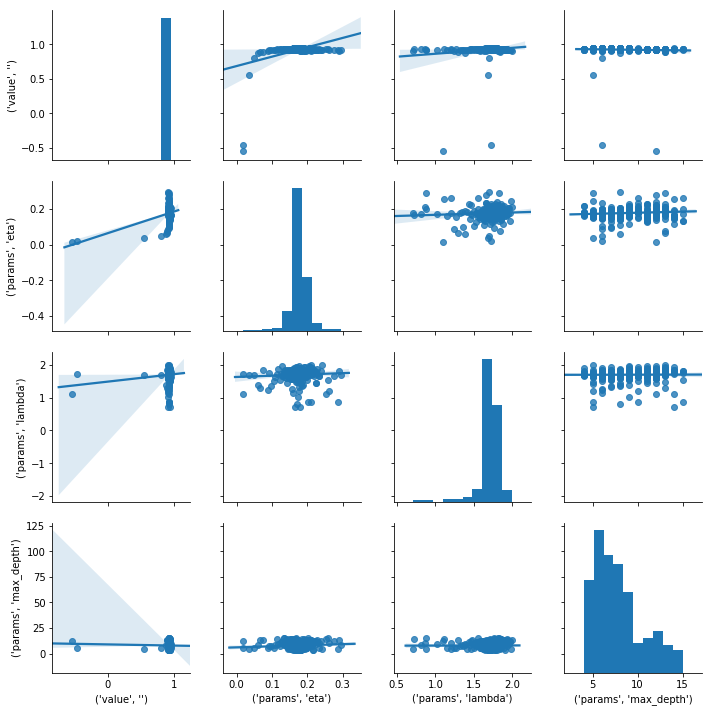

In [9]:
%matplotlib inline
import seaborn as sns

study_df = study.trials_dataframe()[['value', 'params']]
sns.pairplot(study_df, kind='reg')

## 見つけたパラメータでモデル作成

In [10]:
from sklearn.metrics import r2_score

def eval_model(params, trains, tests):
    model = xgb.train(params, trains, num_boost_round=100, verbose_eval=False, evals=watchlist)
    predicts = model.predict(tests)
    r2 = r2_score(test_labels, predicts)
    
    return r2

In [11]:
base_r2 = eval_model(base_params, trains, tests)

merged_params = dict(base_params, **study.best_params)
best_r2 = eval_model(merged_params, trains, tests)

print(f'Base params: {base_params}')
print(f'Best params: {merged_params}')
print(f'Base: {base_r2}, Best: {best_r2}, Diff: {best_r2 - base_r2}')

Base params: {'booster': 'gbtree', 'objective': 'reg:squarederror', 'eval_metric': 'rmse'}
Best params: {'booster': 'gbtree', 'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'eta': 0.16519267749243557, 'max_depth': 7, 'lambda': 1.72021507963037}
Base: 0.8937800621867638, Best: 0.94643405613549, Diff: 0.052653993948726274
